# Exploratory Data Analysis

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from spectroscopy.src.preprocessing.leaf_sample_reader import LeafSampleReader
from spectroscopy.src.preprocessing.data_summariser import DataSummariser
from spectroscopy.src.preprocessing.data_cleaner import DataCleaner
from spectroscopy.src.utility_functions import get_working_directory

C:\Users\rajdh\AppData\Local\Temp\ipykernel_42804\2058751119.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
working_directory_path = get_working_directory()
leaf_samples_folder_path = f"{working_directory_path}/data/leaf_samples"
leaf_sample_reader = LeafSampleReader(leaf_samples_folder_path)
ds = DataSummariser(get_working_directory())

## Train-Test-Split

In [5]:
dried = leaf_sample_reader.read_selected_csvs(leaf_states=["dried"], seasons=[1,2,4])
dried = DataCleaner.drop_null_data(dried, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
dried = DataCleaner.impute_data(dried, target_method="knn")
dried.info()
# dried_scaled = ds.min_max_scaler(leaf_sample_reader.extract_targets(dried))
# dried_scaled["leaf_state"] = "DRIED"
# fresh = leaf_sample_reader.read_selected_csvs(leaf_states=["fresh"], seasons=[1,2,3])
# fresh = DataCleaner.drop_null_data(fresh, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
# fresh_scaled = ds.min_max_scaler(leaf_sample_reader.extract_targets(fresh))
# fresh_scaled["leaf_state"] = "FRESH"

ValueError: could not convert string to float: '                                            '

In [149]:
merge = pd.concat([dried_scaled, fresh_scaled], ignore_index=True)
merge = DataCleaner.impute_data(merge, target_method="knn", feature_method=None)
merge_targets = ds.min_max_scaler(leaf_sample_reader.extract_targets(merge)

In [ ]:
dfmeltfresh = pd.melt(merge, id_vars=['leaf_state'], value_vars=[col for col in scaled_fresh_df.columns if col!="leaf_state"])
df_combined = pd.concat([dfmeltdried, dfmeltfresh], ignore_index=True)
sort = df_combined.sort_values(by="leaf_state", ascending=False)
ds.generate_violin_plot(df=sort,x='variable', y='value', hue='leaf_state', split=True, scatter=False, leaf_state="KNN S1", figsize=(20,5))

In [127]:
leaf_df = DataCleaner.enforce_data_types(leaf_df)

In [128]:
leaf_df = DataCleaner.drop_null_data(leaf_df, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
leaf_df = DataCleaner.impute_data(leaf_df, target_method="knn", feature_method="neighbour_avg")

In [129]:
s1_dried = leaf_df[(leaf_df["season"]==1) & (leaf_df["leaf_state"]=="DRIED")]

In [130]:
s1_fresh = leaf_df[(leaf_df["season"]==1) & (leaf_df["leaf_state"]=="FRESH")].reset_index()

In [131]:
s1_dried_targets = leaf_sample_reader.extract_targets(s1_dried)
s1_fresh_targets = leaf_sample_reader.extract_targets(s1_fresh)
scaled_dried_df = ds.min_max_scaler(s1_dried_targets)
scaled_dried_df["leaf_state"]= s1_dried["leaf_state"]
scaled_fresh_df = ds.min_max_scaler(s1_fresh_targets)
scaled_fresh_df["leaf_state"]= s1_fresh["leaf_state"]

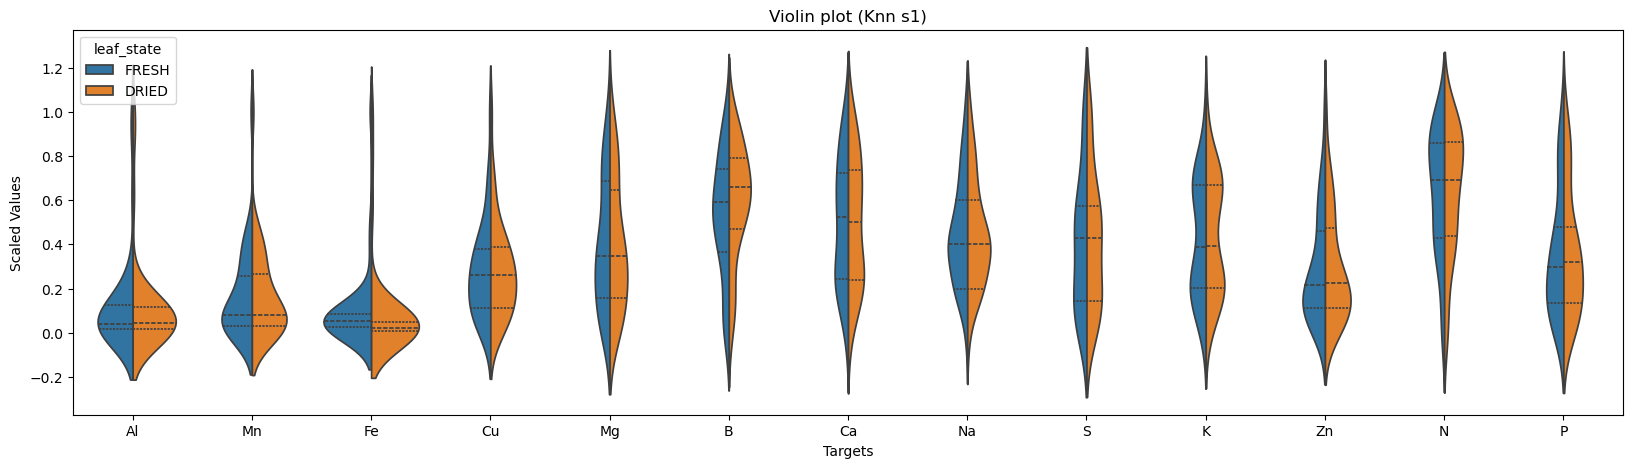

In [132]:
dfmeltdried = pd.melt(scaled_dried_df, id_vars=['leaf_state'], value_vars=[col for col in scaled_dried_df.columns if col!="leaf_state"])
dfmeltfresh = pd.melt(scaled_fresh_df, id_vars=['leaf_state'], value_vars=[col for col in scaled_fresh_df.columns if col!="leaf_state"])
df_combined = pd.concat([dfmeltdried, dfmeltfresh], ignore_index=True)
sort = df_combined.sort_values(by="leaf_state", ascending=False)
ds.generate_violin_plot(df=sort,x='variable', y='value', hue='leaf_state', split=True, scatter=False, leaf_state="KNN S1", figsize=(20,5))

In [146]:
leaf_targets = leaf_sample_reader.extract_targets(leaf_df)
scaled_leaf = ds.min_max_scaler(leaf_targets)
scaled_leaf["leaf_state"] = leaf_df["leaf_state"]
leaf_melt = pd.melt(scaled_leaf, id_vars=['leaf_state'], value_vars=[col for col in leaf_targets.columns if col!="leaf_state"])
sort = leaf_melt.sort_values(by="leaf_state", ascending=False)
ds.generate_violin_plot(df=sort,x='variable', y='value', hue='leaf_state', split=True, scatter=False, leaf_state="All", figsize=(20,5))

In [133]:
ds.save_graph(format="jpg")

In [134]:
leaf_df_ml = leaf_sample_reader.read_all_csvs(leaf_state=None, season=None)
leaf_df_ml = DataCleaner.enforce_data_types(leaf_df_ml)
leaf_df_ml = DataCleaner.drop_null_data(leaf_df_ml, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)

In [135]:
dried_targets = leaf_sample_reader.extract_targets(leaf_df_ml[(leaf_df_ml["leaf_state"]=="DRIED") & (leaf_df_ml["season"]==1)])
fresh_targets = leaf_sample_reader.extract_targets(leaf_df_ml[(leaf_df_ml["leaf_state"]=="FRESH") & (leaf_df_ml["season"]==1)])

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
reg = GradientBoostingRegressor(random_state=0)
targets = [col for col in list(dried_targets.columns) if col is not "Fe"]
X = DataCleaner.impute_data(dried_targets[targets], target_method="knn", feature_method=None)
y = dried_targets["Fe"]

 <>:5: SyntaxWarning:"is not" with a literal. Did you mean "!="?
 <>:5: SyntaxWarning:"is not" with a literal. Did you mean "!="?
 C:\Users\rajdh\AppData\Local\Temp\ipykernel_46012\2929107592.py:5: SyntaxWarning:"is not" with a literal. Did you mean "!="?


In [137]:
reg.fit(X, y)

GradientBoostingRegressor(random_state=0)

In [138]:
fresh_targets["Fe"] = reg.predict(DataCleaner.impute_data(fresh_targets[targets], target_method="knn", feature_method=None))


In [139]:
dried_targets = DataCleaner.impute_data(dried_targets, target_method="knn", feature_method=None)
fresh_targets = DataCleaner.impute_data(fresh_targets, target_method="knn", feature_method=None)

In [140]:
scaled_dried_df = ds.min_max_scaler(dried_targets)
scaled_dried_df["leaf_state"]= "DRIED"
scaled_fresh_df = ds.min_max_scaler(fresh_targets)
scaled_fresh_df["leaf_state"]= "FRESH"

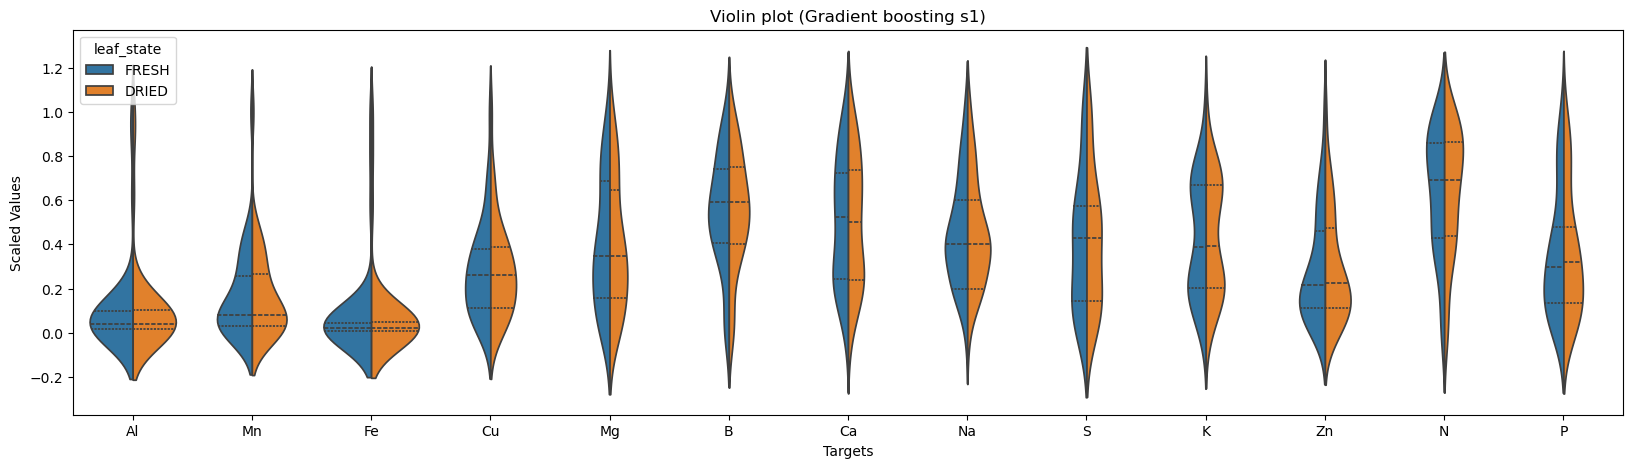

In [141]:
dfmeltdried = pd.melt(scaled_dried_df, id_vars=['leaf_state'], value_vars=[col for col in scaled_dried_df.columns if col!="leaf_state"])
dfmeltfresh = pd.melt(scaled_fresh_df, id_vars=['leaf_state'], value_vars=[col for col in scaled_fresh_df.columns if col!="leaf_state"])
df_combined = pd.concat([dfmeltdried, dfmeltfresh], ignore_index=True)
sort = df_combined.sort_values(by="leaf_state", ascending=False)
ds.generate_violin_plot(df=sort,x='variable', y='value', hue='leaf_state', split=True, scatter=False, leaf_state="Gradient Boosting S1", figsize=(20,5))

In [142]:
ds.save_graph(format="jpg")

## Full Data <a class="anchor" id="full-data"></a>

In [3]:
leaf_df = leaf_sample_reader.read_all_csvs(leaf_state=None, season=None)
leaf_df = DataCleaner.enforce_data_types(leaf_df)
leaf_df = DataCleaner.drop_null_data(leaf_df, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
leaf_df = DataCleaner.impute_data(leaf_df, target_method=None, feature_method="neighbour_avg")

In [4]:
leaf_df.columns

Index(['sample_id', 'N', 'P', 'Ca', 'K', 'Mn', 'Mg', 'B', 'S', 'Na',
       ...
       '2496nm', '2496.5nm', '2497nm', '2497.5nm', '2498nm', '2498.5nm',
       '2499nm', '2499.5nm', 'leaf_state', 'season'],
      dtype='object', length=4216)

In [8]:
P = ['N','P','K','Ca','Mg','S','Na','Cl']
PPM = ['Mn', 'B','Zn','Fe','Cu','Al']
add_cols = ['leaf_state','season']

In [5]:
df = pd.pivot_table(leaf_df[['leaf_state','season']], values='leaf_state', index=['season'],
                       columns=['leaf_state'], aggfunc="value_counts")

In [6]:
df

leaf_state  DRIED  FRESH
season                  
1            39.0   40.0
2           144.0  144.0
3            98.0  105.0
4           104.0    NaN

In [7]:
list(df.columns.values)

['DRIED', 'FRESH']

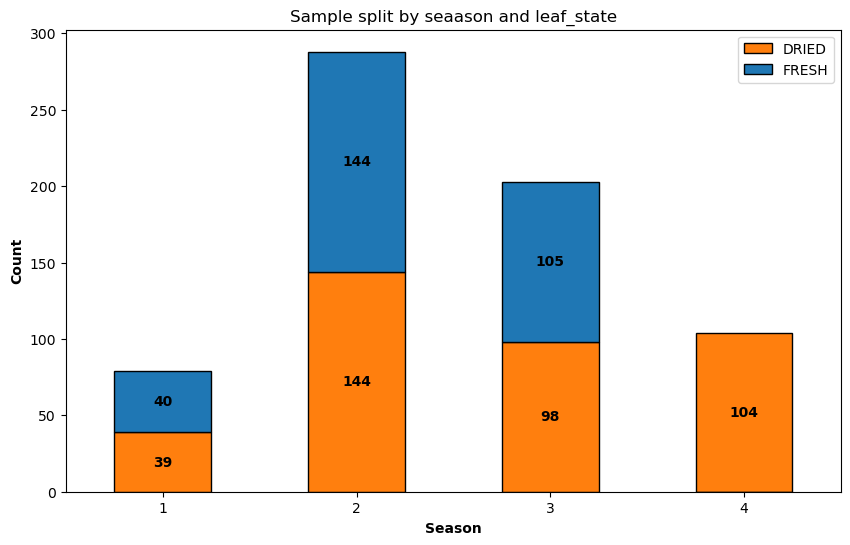

In [8]:
ds.generate_stacked_barchart(df, agg="Count", category_col='Season', stacks=list(df.columns.values), title="Sample split by seaason and leaf_state")

In [10]:
ds.save_graph(format="jpg", dpi=400)

In [5]:
targets_leaf_df = leaf_sample_reader.extract_targets(leaf_df)

In [6]:
targets_leaf_df.columns

Index(['Al', 'B', 'Ca', 'Cu', 'Fe', 'Mg', 'Mn', 'N', 'P', 'K', 'Na', 'S',
       'Zn'],
      dtype='object')

In [17]:
missing = targets_leaf_df.isnull().astype(int)
missing['leaf_state']=leaf_df['leaf_state']

In [18]:
missing

Al  B  Ca  Cu  Fe  Mg  Mn  N  P  K  Na  S  Zn leaf_state
0     1  1   0   0   0   0   0  0  0  0   0  0   0      DRIED
1     1  1   0   0   0   0   0  0  0  0   0  0   0      DRIED
2     1  1   0   0   0   0   0  0  0  0   0  0   0      DRIED
3     0  0   0   0   0   0   0  0  0  0   0  0   0      DRIED
4     0  0   0   0   0   0   0  0  0  0   0  0   0      DRIED
..   .. ..  ..  ..  ..  ..  .. .. .. ..  .. ..  ..        ...
669   0  0   0   0   0   0   0  0  0  0   0  0   0      FRESH
670   0  0   0   0   0   0   0  0  0  0   0  0   0      FRESH
671   0  0   0   0   0   0   0  0  0  0   0  0   0      FRESH
672   0  0   0   0   0   0   0  0  0  0   0  0   0      FRESH
673   0  0   0   0   0   0   0  0  0  0   0  0   0      FRESH

[674 rows x 14 columns]

In [19]:
df = pd.pivot_table(missing, values=list(targets_leaf_df.columns), columns='leaf_state', aggfunc="sum")

In [20]:
df

leaf_state  DRIED  FRESH
Al              3      3
B               3      3
Ca              0      0
Cu              0      0
Fe              0     40
K               0      0
Mg              0      0
Mn              0      0
N               1      1
Na              0      0
P               1      0
S               0      0
Zn              0      0

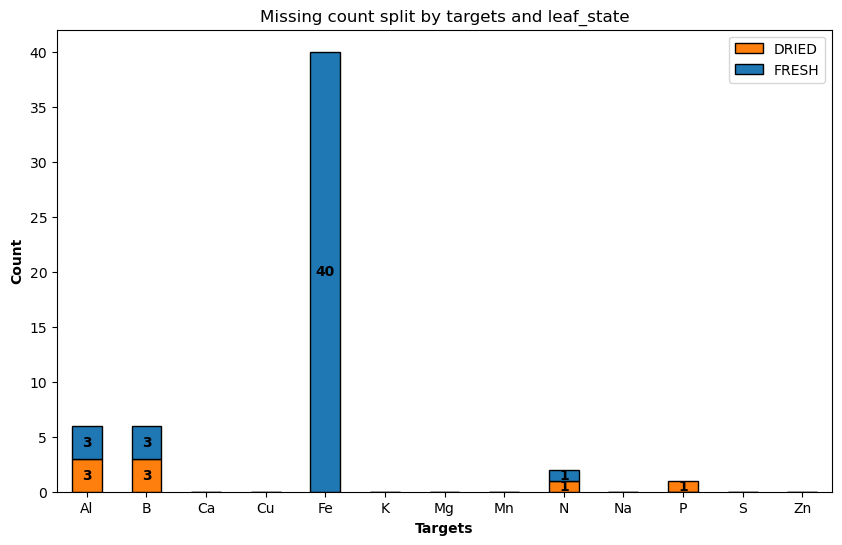

In [21]:
ds.generate_stacked_barchart(df, agg="Count", category_col='Targets', stacks=list(df.columns.values), title="Missing count split by targets and leaf_state")

In [16]:
ds.save_graph(format="jpg", dpi=400)

In [84]:
missing = targets_leaf_df.isnull().astype(int)
missing['season']=leaf_df['season']
missing

Al  B  Ca  Cu  Mg  Mn  N  P  K  Na  S  Zn  season
0     1  1   0   0   0   0  0  0  0   0  0   0       1
1     1  1   0   0   0   0  0  0  0   0  0   0       1
2     1  1   0   0   0   0  0  0  0   0  0   0       1
3     0  0   0   0   0   0  0  0  0   0  0   0       1
4     0  0   0   0   0   0  0  0  0   0  0   0       1
..   .. ..  ..  ..  ..  .. .. .. ..  .. ..  ..     ...
669   0  0   0   0   0   0  0  0  0   0  0   0       3
670   0  0   0   0   0   0  0  0  0   0  0   0       3
671   0  0   0   0   0   0  0  0  0   0  0   0       3
672   0  0   0   0   0   0  0  0  0   0  0   0       3
673   0  0   0   0   0   0  0  0  0   0  0   0       3

[674 rows x 13 columns]

In [18]:
df = pd.pivot_table(missing, values=list(targets_leaf_df.columns), columns='season', aggfunc="sum")
df

season   1  2  3  4
Al       6  0  0  0
B        6  0  0  0
Ca       0  0  0  0
Cu       0  0  0  0
Fe      40  0  0  0
K        0  0  0  0
Mg       0  0  0  0
Mn       0  0  0  0
N        0  0  1  1
Na       0  0  0  0
P        1  0  0  0
S        0  0  0  0
Zn       0  0  0  0

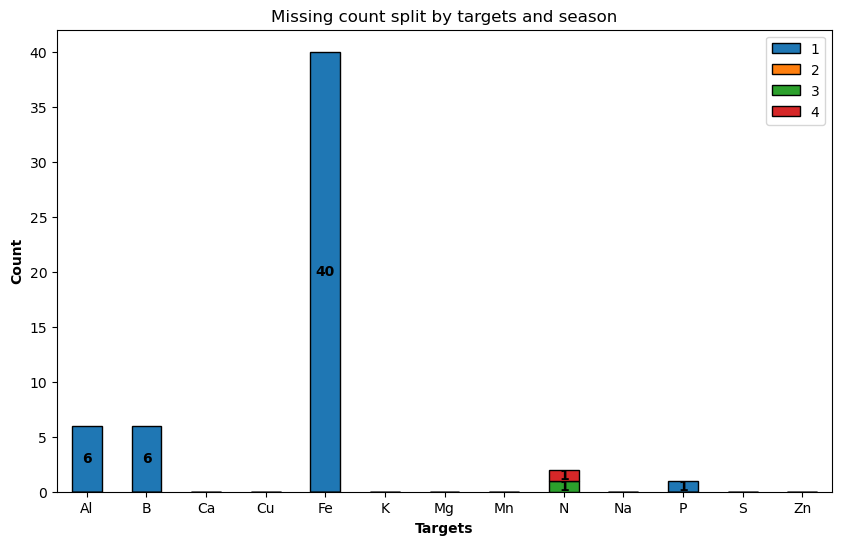

In [19]:
ds.generate_stacked_barchart(df, agg="Count", category_col='Targets', stacks=list(df.columns.values), colormap=plt.cm.tab10.colors, title="Missing count split by targets and season")

In [20]:
ds.save_graph(format="jpg",dpi=400)

In [21]:
targets_leaf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      668 non-null    float64
 1   B       668 non-null    float64
 2   Ca      674 non-null    float64
 3   Cu      674 non-null    float64
 4   Fe      634 non-null    float64
 5   Mg      674 non-null    float64
 6   Mn      674 non-null    float64
 7   N       672 non-null    float64
 8   P       673 non-null    float64
 9   K       674 non-null    float64
 10  Na      674 non-null    float64
 11  S       674 non-null    float64
 12  Zn      674 non-null    float64
dtypes: float64(13)
memory usage: 68.6 KB


In [22]:
targets_leaf_df.describe()

Al           B          Ca          Cu           Fe  \
count   668.000000  668.000000  674.000000  674.000000   634.000000   
mean    147.847754   37.161183    1.551365    9.982344   197.397634   
std     254.450154   29.443724    0.575623    8.643914   339.289767   
min       1.000000   13.000000    0.620000    1.000000    39.000000   
25%      35.000000   22.810000    1.112500    5.000000    78.000000   
50%      71.000000   28.700000    1.410000    7.000000   114.500000   
75%     138.250000   35.000000    1.890000   12.000000   185.000000   
max    2415.000000  228.000000    3.590000   61.700000  4307.000000   

               Mg           Mn           N           P           K  \
count  674.000000   674.000000  672.000000  673.000000  674.000000   
mean     0.735297   409.392136    3.632708    0.200773    7.340519   
std      0.371841   291.641260    1.103252    0.096506    2.197496   
min      0.220000    32.000000    1.210000    0.070000    2.050000   
25%      0.440000   199.150000    2.807500    0.120000    5.620000   
50%      0.630000   316.000000    3.660000    0.180000    7.460000   
75%      0.997500   559.000000    4.462500    0.250000    8.920000   
max      2.080000  2545.000000    6.040000    0.550000   13.250000   

               Na           S          Zn  
count  674.000000  674.000000  674.000000  
mean     0.020935    0.185074   44.522255  
std      0.014521    0.041714   34.714089  
min      0.000000    0.090000    8.000000  
25%      0.010000    0.150000   24.050000  
50%      0.010000    0.190000   34.000000  
75%      0.030000    0.220000   53.000000  
max      0.080000    0.290000  282.000000

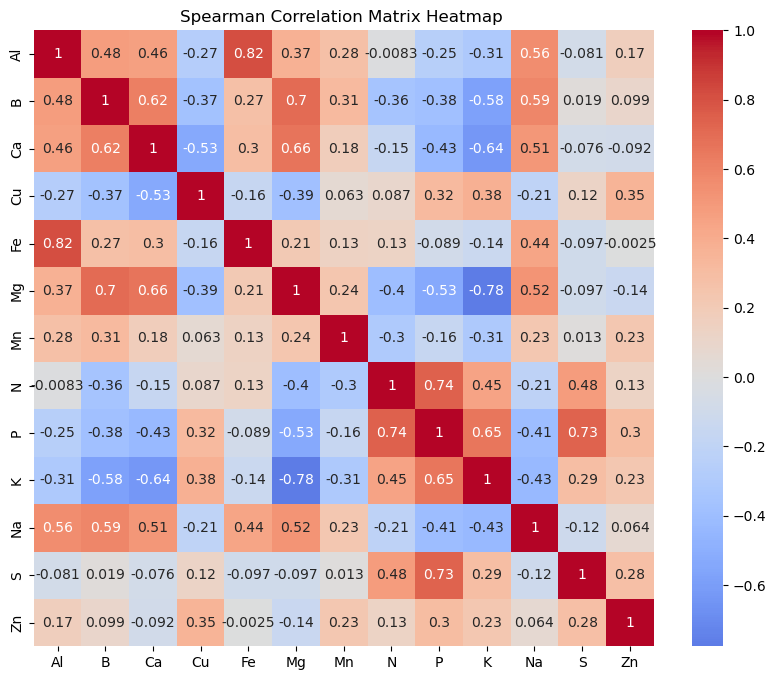

In [23]:
ds.generate_correlation_matrix(targets_leaf_df, method="spearman")

In [24]:
scaled_leaf_df = ds.min_max_scaler(targets_leaf_df)

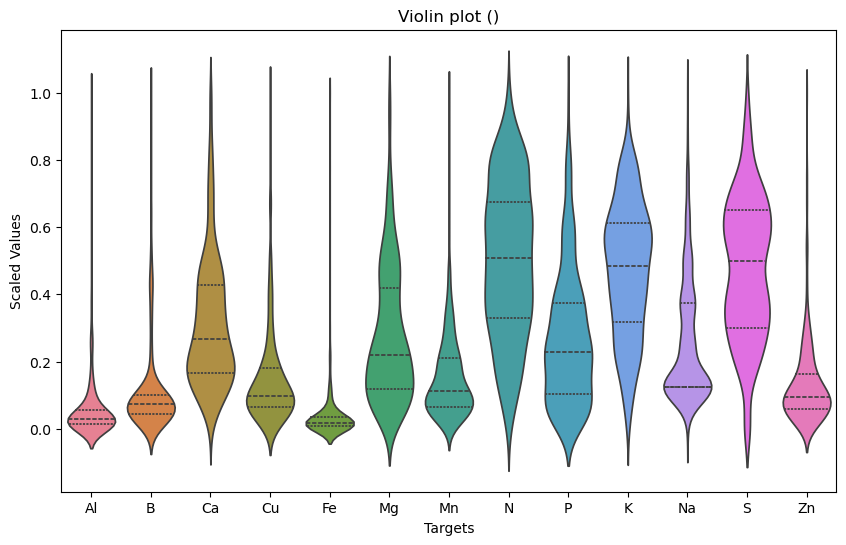

In [25]:
ds.generate_violin_plot(df=scaled_leaf_df,scatter=False, figsize=(10,6))

In [26]:
ds.save_graph(format="jpg", dpi=400)

In [27]:
skewness_leaf_df = DataSummariser.summarize_skewness(targets_leaf_df)
skewness_leaf_df

Column  Skewness                Interpretation
0      Al  4.990362      Highly Positively Skewed
1       B  3.032618      Highly Positively Skewed
2      Ca  1.104818      Highly Positively Skewed
3      Cu  2.444068      Highly Positively Skewed
4      Fe  8.111364      Highly Positively Skewed
5      Mg  0.999495  Moderately Positively Skewed
6      Mn  1.948375      Highly Positively Skewed
7       N -0.073798       Approximately Symmetric
8       P  0.925060  Moderately Positively Skewed
9       K -0.167836       Approximately Symmetric
10     Na  1.267650      Highly Positively Skewed
11      S -0.028055       Approximately Symmetric
12     Zn  2.804969      Highly Positively Skewed

In [9]:
targets_leaf_df['leaf_state']=leaf_df['leaf_state']
targets_leaf_df['season']=leaf_df['season']
targets_leaf_df
cols = ['N','K','Ca','Mg']
for col in cols:
    if col not in targets_leaf_df.columns:
        cols.remove(col)
cols.extend(add_cols)
p_df = targets_leaf_df[cols]
cols.remove('leaf_state')
cols.remove('season')
df_long = pd.melt(p_df, id_vars=['leaf_state','season'], value_vars=cols,var_name="Targets", value_name="Value_%")
sort = df_long.sort_values(by="leaf_state", ascending=False)

C:\Users\rajdh\AppData\Local\Temp\ipykernel_47884\432665664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets_leaf_df['leaf_state']=leaf_df['leaf_state']
C:\Users\rajdh\AppData\Local\Temp\ipykernel_47884\432665664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets_leaf_df['season']=leaf_df['season']


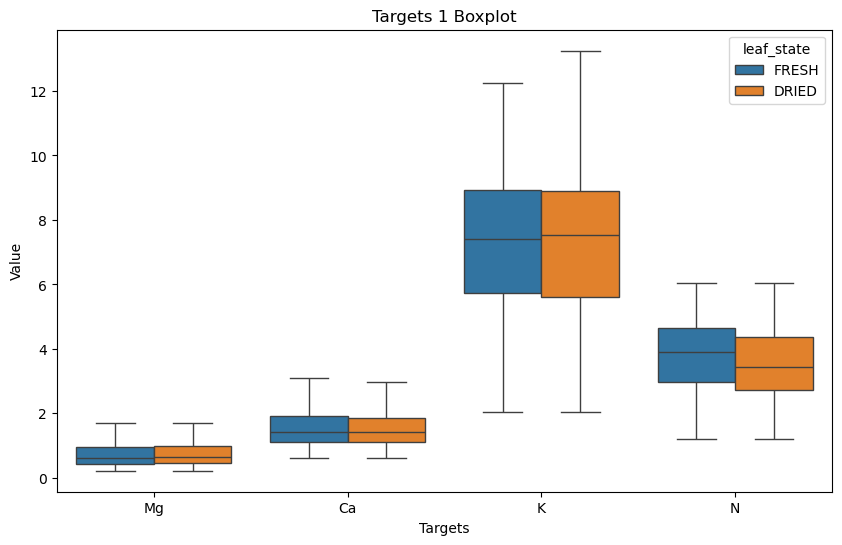

In [10]:
ds.generate_boxplots(sort, x='Targets', y="Value_%", hue="leaf_state", title = "Targets 1 Boxplot", figsize=(10,6))

In [30]:
ds.save_graph("jpg",400)

In [11]:
targets_leaf_df['leaf_state']=leaf_df['leaf_state']
targets_leaf_df['season']=leaf_df['season']
targets_leaf_df
cols = ['P','S','Na']
for col in cols:
    if col not in targets_leaf_df.columns:
        cols.remove(col)
cols.extend(add_cols)
p_df = targets_leaf_df[cols]

C:\Users\rajdh\AppData\Local\Temp\ipykernel_47884\286712891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets_leaf_df['leaf_state']=leaf_df['leaf_state']
C:\Users\rajdh\AppData\Local\Temp\ipykernel_47884\286712891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets_leaf_df['season']=leaf_df['season']


In [12]:
p_df
cols.remove('leaf_state')
cols.remove('season')
cols

['P', 'S', 'Na']

In [13]:
df_long = pd.melt(p_df, id_vars=['leaf_state','season'], value_vars=cols,var_name="Targets", value_name="Value")
sort = df_long.sort_values(by="leaf_state", ascending=False)

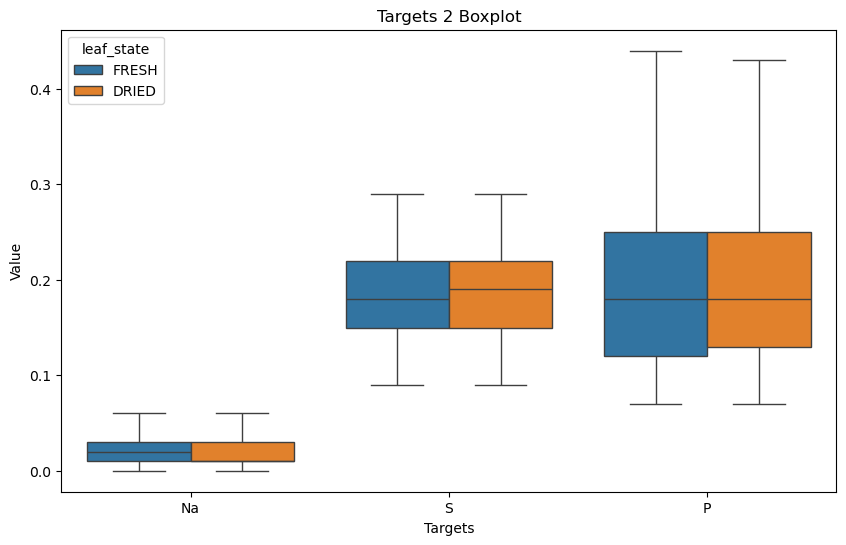

In [14]:
ds.generate_boxplots(sort, x='Targets', y="Value", hue="leaf_state", title = "Targets 2 Boxplot", figsize=(10,6))

In [45]:
ds.save_graph("jpg",400)

In [9]:
targets_leaf_df['leaf_state']=leaf_df['leaf_state']
targets_leaf_df['season']=leaf_df['season']
targets_leaf_df
cols = ['Mn','Fe','Al']
for col in cols:
    if col not in targets_leaf_df.columns:
        cols.remove(col)
cols.extend(add_cols)
p_df = targets_leaf_df[cols]
p_df
cols.remove('leaf_state')
cols.remove('season')
cols
df_long = pd.melt(p_df, id_vars=['leaf_state','season'], value_vars=cols,var_name="Targets", value_name="Value")
sort = df_long.sort_values(by="leaf_state", ascending=False)
ds.generate_boxplots(df_long, x='Targets', y="Value", hue="leaf_state", title="Targets 3 Boxplot", figsize=(10,6))

C:\Users\rajdh\AppData\Local\Temp\ipykernel_25596\2250744634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets_leaf_df['leaf_state']=leaf_df['leaf_state']
C:\Users\rajdh\AppData\Local\Temp\ipykernel_25596\2250744634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets_leaf_df['season']=leaf_df['season']


In [53]:
ds.save_graph("jpg",400)

In [16]:
targets_leaf_df['leaf_state']=leaf_df['leaf_state']
targets_leaf_df['season']=leaf_df['season']
targets_leaf_df
cols = ['B','Zn','Cu']
for col in cols:
    if col not in targets_leaf_df.columns:
        cols.remove(col)
cols.extend(add_cols)
p_df = targets_leaf_df[cols]
p_df
cols.remove('leaf_state')
cols.remove('season')
cols
df_long = pd.melt(p_df, id_vars=['leaf_state','season'], value_vars=cols,var_name="Targets", value_name="Value")
sort = df_long.sort_values(by="leaf_state", ascending=False)
ds.generate_boxplots(df_long, x='Targets', y="Value", hue="leaf_state", title="Targets 4 Boxplot", figsize=(10,6))

C:\Users\rajdh\AppData\Local\Temp\ipykernel_47884\2729712367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets_leaf_df['leaf_state']=leaf_df['leaf_state']
C:\Users\rajdh\AppData\Local\Temp\ipykernel_47884\2729712367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets_leaf_df['season']=leaf_df['season']


In [51]:
ds.save_graph("jpg",400)

In [1]:
targets_leaf_df['leaf_state']=leaf_df['leaf_state']
targets_leaf_df['season']=leaf_df['season']
targets_leaf_df
cols = ['N','K','Ca','Mg']
for col in cols:
    if col not in targets_leaf_df.columns:
        cols.remove(col)
cols.extend(add_cols)
p_df = targets_leaf_df[cols]
cols.remove('leaf_state')
cols.remove('season')
df_long = pd.melt(p_df, id_vars=['leaf_state','season'], value_vars=cols,var_name="Targets", value_name="Value_%")
sort = df_long.sort_values(by="leaf_state", ascending=False)
ds.generate_boxplots(sort, x='Targets', y="Value_%", hue="season", title = "Targets 5 Boxplot", figsize=(10,6))

NameError: name 'leaf_df' is not defined

In [56]:
ds.save_graph("jpg",400)

In [20]:
targets_leaf_df['leaf_state']=leaf_df['leaf_state']
targets_leaf_df['season']=leaf_df['season']
targets_leaf_df['Na'][targets_leaf_df['season']==3]
# cols = ['Na']
# for col in cols:
#     if col not in targets_leaf_df.columns:
#         cols.remove(col)
# cols.extend(add_cols)
# p_df = targets_leaf_df[cols]
# cols.remove('leaf_state')
# cols.remove('season')
# df_long = pd.melt(p_df, id_vars=['leaf_state','season'], value_vars=cols,var_name="Targets", value_name="Value")
# sort = df_long.sort_values(by="leaf_state", ascending=False)
# ds.generate_boxplots(sort, x='Targets', y="Value", hue="season", title = "Targets 6 Boxplot", figsize=(10,6))

C:\Users\rajdh\AppData\Local\Temp\ipykernel_25596\2858438713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets_leaf_df['leaf_state']=leaf_df['leaf_state']
C:\Users\rajdh\AppData\Local\Temp\ipykernel_25596\2858438713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets_leaf_df['season']=leaf_df['season']


183    0.01
184    0.01
185    0.01
186    0.02
187    0.01
       ... 
669    0.01
670    0.01
671    0.01
672    0.01
673    0.01
Name: Na, Length: 203, dtype: float64

In [59]:
ds.save_graph("jpg",400)

In [60]:
targets_leaf_df['leaf_state']=leaf_df['leaf_state']
targets_leaf_df['season']=leaf_df['season']
targets_leaf_df
cols = ['Mn','Fe','Al']
for col in cols:
    if col not in targets_leaf_df.columns:
        cols.remove(col)
cols.extend(add_cols)
p_df = targets_leaf_df[cols]
p_df
cols.remove('leaf_state')
cols.remove('season')
cols
df_long = pd.melt(p_df, id_vars=['leaf_state','season'], value_vars=cols,var_name="Targets", value_name="Value")
sort = df_long.sort_values(by="leaf_state", ascending=False)
ds.generate_boxplots(df_long, x='Targets', y="Value", hue="season", title="Targets 7 Boxplot", figsize=(10,6))

In [61]:
ds.save_graph("jpg",400)

In [63]:
targets_leaf_df['leaf_state']=leaf_df['leaf_state']
targets_leaf_df['season']=leaf_df['season']
targets_leaf_df
cols = ['B','Zn','Cu']
for col in cols:
    if col not in targets_leaf_df.columns:
        cols.remove(col)
cols.extend(add_cols)
p_df = targets_leaf_df[cols]
p_df
cols.remove('leaf_state')
cols.remove('season')
cols
df_long = pd.melt(p_df, id_vars=['leaf_state','season'], value_vars=cols,var_name="Targets", value_name="Value")
sort = df_long.sort_values(by="leaf_state", ascending=False)
ds.generate_boxplots(df_long, x='Targets', y="Value", hue="season", title="Targets 8 Boxplot", figsize=(10,6))

In [64]:
ds.save_graph("jpg",400)

## [Leaf State](#leaf-state)

In [3]:
dried = leaf_sample_reader.read_all_csvs(leaf_state="dried", season=3)
dried = DataCleaner.enforce_data_types(dried)
dried = DataCleaner.drop_null_data(dried, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
dried = DataCleaner.impute_data(dried, target_method="knn", feature_method="neighbour_avg")

In [4]:
targets_df_dried = leaf_sample_reader.extract_targets(dried)

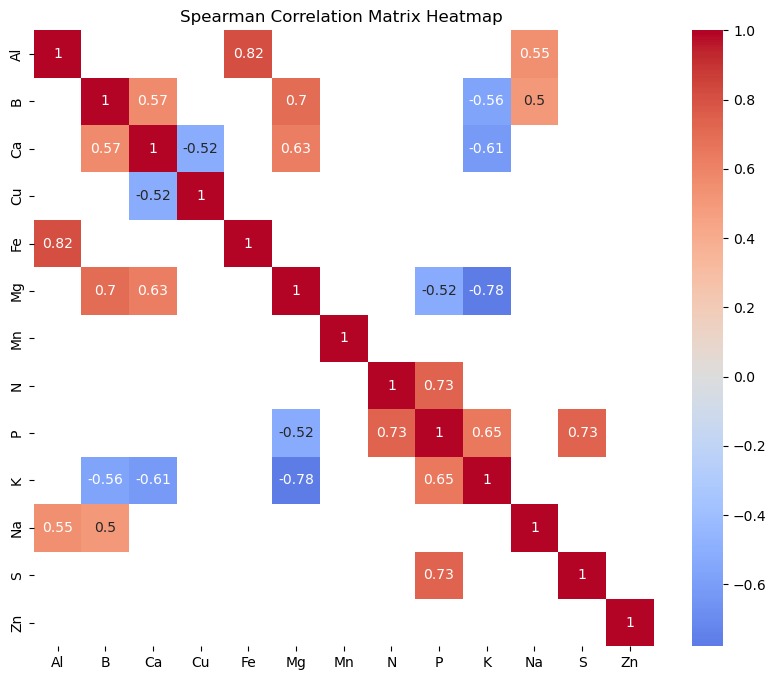

In [6]:
ds.generate_correlation_matrix(targets_df_dried, method="spearman",mask=True,threshold=0.5)

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet
from scipy.stats import chi2
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

# Quantile Transformation Function
def quantile_transformation(data, output_distribution='normal', n_quantiles=1000, random_state=42):
    """
    Apply Quantile Transformation to make the data follow a specified distribution.
    
    Parameters:
    - data: The input data (should be numerical).
    - output_distribution: 'normal' (default) or 'uniform'. Specifies the target distribution.
    - n_quantiles: Number of quantiles to use for transforming the data (default is 1000).
    - random_state: Seed for reproducibility (default is 42).
    
    Returns:
    - transformed_data: The transformed data with specified distribution.
    """
    transformer = QuantileTransformer(n_quantiles=n_quantiles, output_distribution=output_distribution, random_state=random_state)
    transformed_data = transformer.fit_transform(data)
    return transformed_data

# Yeo-Johnson transformation function
def yeo_johnson_transformation(data):
    transformer = PowerTransformer(method='box-cox')
    transformed_data = transformer.fit_transform(data)
    return transformed_data

def reciprocal_transformation(data):
    # Ensure there are no zeros or negative values in the data before applying reciprocal transformation
    if (data <= 0).any():
        raise ValueError("Data contains zero or negative values, which are not valid for reciprocal transformation.")
    
    transformed_data = 1 / data
    return transformed_data

# Sample data
# Assuming data is a DataFrame with your 13 variables as columns.
# Replace this with your actual data.
# Example: data = pd.read_csv('your_data.csv')

# Step 1: Transform variables to reduce skewness
def transform_skewed_data(data):
    transformed_data = data.copy()
    for column in data.columns:
        # if data[column].skew() > 0.5:  # Checking if the variable is positively skewed
        transformed_data[column] = np.log1p(data[column])  # Log transformation
    return transformed_data

# Step 2: Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(data)
    return standardized_data

# Step 3: Robust PCA using MCD
def robust_pca(data):
    mcd = MinCovDet()
    mcd.fit(data)
    return mcd

# Step 4: Mahalanobis Distance and outlier detection using chi-squared distribution
def detect_outliers(data, pca_model, threshold=0.95):
    # Calculate the Mahalanobis distance for each data point
    # Project the data onto the principal components
    scores = pca_model.score_samples(data)
    mahalanobis_distances = np.square(scores)
    
    # Find the chi-squared threshold
    p_value_threshold = chi2.ppf(threshold, df=data.shape[1])  # Degrees of freedom is the number of variables
    
    # Identify outliers
    outliers = mahalanobis_distances > p_value_threshold
    return outliers, mahalanobis_distances

# Putting it all together
def process_data(data):
    # Step 1: Transform the data
    transformed_data = quantile_transformation(data, output_distribution='normal', n_quantiles=1000, random_state=42)

    # Step 2: Standardize the data
    # standardized_data = standardize_data(transformed_data)

    # Step 3: Apply Robust PCA (using MCD)
    pca_model = robust_pca(transformed_data)

    # Step 4: Detect outliers
    outliers, mahalanobis_distances = detect_outliers(transformed_data, pca_model)

    # Print outliers indices
    print("Outlier Indices:", np.where(outliers)[0])

    # Optional: Plot Mahalanobis distances to visually inspect the outliers
    plt.figure(figsize=(10,6))
    plt.hist(mahalanobis_distances, bins=50, alpha=0.7)
    plt.axvline(x=chi2.ppf(0.99, df=transformed_data.shape[1]), color='r', linestyle='--')
    plt.title('Mahalanobis Distance Histogram with Threshold')
    plt.xlabel('Mahalanobis Distance')
    plt.ylabel('Frequency')
    plt.show()

    return outliers

# Example usage
# Assuming your DataFrame `data` contains the 13 variables
# outliers = process_data(data)


In [42]:
data = quantile_transformation(targets_df_dried, output_distribution='normal', n_quantiles=10000, random_state=42)
# data = standardize_data(targets_df_dried)

C:\Users\rajdh\anaconda3\envs\DSMP\Lib\site-packages\sklearn\preprocessing\_data.py:2764: UserWarning: n_quantiles (10000) is greater than the total number of samples (385). n_quantiles is set to n_samples.
  warnings.warn(


In [39]:
out = process_data(targets_df_dried)

C:\Users\rajdh\anaconda3\envs\DSMP\Lib\site-packages\sklearn\preprocessing\_data.py:2764: UserWarning: n_quantiles (1000) is greater than the total number of samples (385). n_quantiles is set to n_samples.
  warnings.warn(


AttributeError: 'MinCovDet' object has no attribute 'score_samples'

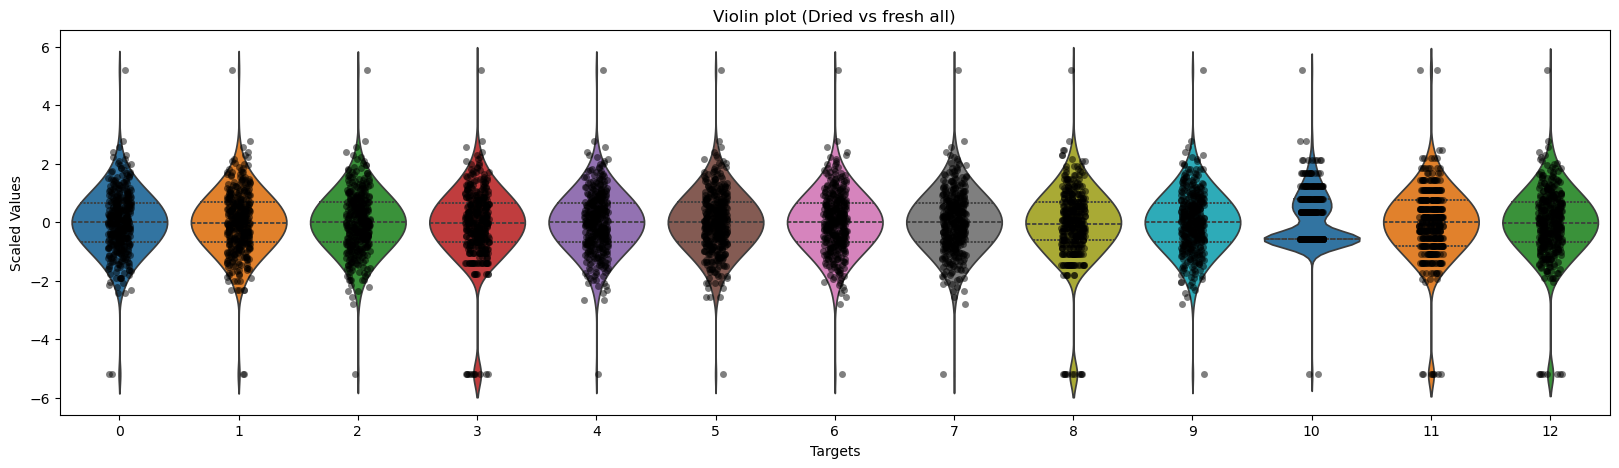

In [43]:
ds.generate_violin_plot(df=data, scatter=True, leaf_state="Dried vs Fresh All", figsize=(20,5))

In [5]:
targets_df_dried.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      382 non-null    float64
 1   B       382 non-null    float64
 2   Ca      385 non-null    float64
 3   Cu      385 non-null    float64
 4   Fe      385 non-null    float64
 5   Mg      385 non-null    float64
 6   Mn      385 non-null    float64
 7   N       384 non-null    float64
 8   P       384 non-null    float64
 9   K       385 non-null    float64
 10  Na      385 non-null    float64
 11  S       385 non-null    float64
 12  Zn      385 non-null    float64
dtypes: float64(13)
memory usage: 39.2 KB


In [6]:
targets_df_dried.describe()

Al           B          Ca          Cu           Fe  \
count   382.000000  382.000000  385.000000  385.000000   385.000000   
mean    133.987696   36.532513    1.544623   10.025143   192.327532   
std     241.107192   27.691696    0.559557    8.941259   348.992242   
min       1.000000   13.000000    0.620000    1.000000    39.000000   
25%      31.000000   23.640000    1.120000    5.000000    76.000000   
50%      58.250000   29.000000    1.410000    7.000000   109.700000   
75%     124.750000   35.000000    1.860000   11.600000   179.000000   
max    2415.000000  228.000000    3.590000   61.700000  4307.000000   

               Mg           Mn           N           P           K  \
count  385.000000   385.000000  384.000000  384.000000  385.000000   
mean     0.744571   390.156623    3.538125    0.199688    7.349169   
std      0.361376   281.223600    1.082947    0.093641    2.186138   
min      0.220000    32.000000    1.210000    0.070000    2.050000   
25%      0.460000   196.000000    2.717500    0.130000    5.600000   
50%      0.660000   304.700000    3.435000    0.180000    7.540000   
75%      1.000000   524.000000    4.372500    0.250000    8.910000   
max      2.080000  2545.000000    6.040000    0.550000   13.250000   

               Na           S          Zn  
count  385.000000  385.000000  385.000000  
mean     0.019844    0.186182   44.161039  
std      0.013975    0.040783   33.858568  
min      0.000000    0.090000    8.000000  
25%      0.010000    0.150000   24.000000  
50%      0.010000    0.190000   34.000000  
75%      0.030000    0.220000   53.000000  
max      0.080000    0.290000  282.000000

In [7]:
ds.generate_correlation_matrix(targets_df_dried, method="spearman", leaf_state="dried")

In [8]:
skewness_dried_df = DataSummariser.summarize_skewness(targets_df_dried)
skewness_dried_df

Column  Skewness                Interpretation
0      Al  5.305084      Highly Positively Skewed
1       B  3.266341      Highly Positively Skewed
2      Ca  1.148256      Highly Positively Skewed
3      Cu  2.646119      Highly Positively Skewed
4      Fe  7.781112      Highly Positively Skewed
5      Mg  0.937203  Moderately Positively Skewed
6      Mn  2.057999      Highly Positively Skewed
7       N  0.075615       Approximately Symmetric
8       P  0.936796  Moderately Positively Skewed
9       K -0.134656       Approximately Symmetric
10     Na  1.437926      Highly Positively Skewed
11      S -0.069145       Approximately Symmetric
12     Zn  2.760675      Highly Positively Skewed

In [8]:
outliers_dried = ds.detect_outliers_iqr(targets_df_dried)
outliers_dried

Al    B     Ca     Cu     Fe     Mg     Mn    N      P    K     Na  \
0     3.0  135  153.0    3.0    1.0  156.0   21.0  NaN    8.0  NaN  162.0   
1     4.0  136  154.0   56.0    3.0  158.0   32.0  NaN    9.0  NaN  167.0   
2     5.0  137  156.0  101.0    4.0  168.0   33.0  NaN   10.0  NaN  335.0   
3     6.0  140  158.0  103.0    5.0  169.0   34.0  NaN   11.0  NaN    NaN   
4     7.0  147  165.0  221.0    6.0  170.0   38.0  NaN   61.0  NaN    NaN   
5     8.0  148  166.0  225.0    7.0    NaN   78.0  NaN  370.0  NaN    NaN   
6    14.0  149  167.0  229.0    8.0    NaN   79.0  NaN  375.0  NaN    NaN   
7    32.0  150  180.0  236.0   40.0    NaN   80.0  NaN  379.0  NaN    NaN   
8    35.0  151  181.0  240.0   42.0    NaN  103.0  NaN  384.0  NaN    NaN   
9    36.0  152  182.0  244.0   43.0    NaN  150.0  NaN    NaN  NaN    NaN   
10   37.0  153  206.0  260.0   86.0    NaN  151.0  NaN    NaN  NaN    NaN   
11   40.0  154    NaN  265.0   96.0    NaN  152.0  NaN    NaN  NaN    NaN   
12   42.0  155    NaN  271.0  105.0    NaN  174.0  NaN    NaN  NaN    NaN   
13   47.0  156    NaN  277.0  134.0    NaN  323.0  NaN    NaN  NaN    NaN   
14   86.0  157    NaN  297.0  144.0    NaN    NaN  NaN    NaN  NaN    NaN   
15  105.0  158    NaN  298.0  147.0    NaN    NaN  NaN    NaN  NaN    NaN   
16  134.0  159    NaN  303.0  148.0    NaN    NaN  NaN    NaN  NaN    NaN   
17  144.0  160    NaN  304.0  149.0    NaN    NaN  NaN    NaN  NaN    NaN   
18  147.0  161    NaN  307.0  156.0    NaN    NaN  NaN    NaN  NaN    NaN   
19  148.0  162    NaN  308.0  159.0    NaN    NaN  NaN    NaN  NaN    NaN   
20  149.0  163    NaN  309.0  162.0    NaN    NaN  NaN    NaN  NaN    NaN   
21  151.0  164    NaN  313.0  165.0    NaN    NaN  NaN    NaN  NaN    NaN   
22  152.0  165    NaN  314.0  166.0    NaN    NaN  NaN    NaN  NaN    NaN   
23  156.0  166    NaN  318.0  167.0    NaN    NaN  NaN    NaN  NaN    NaN   
24  159.0  167    NaN  322.0  171.0    NaN    NaN  NaN    NaN  NaN    NaN   
25  160.0  168    NaN  323.0  172.0    NaN    NaN  NaN    NaN  NaN    NaN   
26  162.0  169    NaN  358.0  173.0    NaN    NaN  NaN    NaN  NaN    NaN   
27  164.0  170    NaN  362.0  174.0    NaN    NaN  NaN    NaN  NaN    NaN   
28  165.0  171    NaN  363.0  175.0    NaN    NaN  NaN    NaN  NaN    NaN   
29  166.0  172    NaN  367.0  176.0    NaN    NaN  NaN    NaN  NaN    NaN   
30  167.0  173    NaN  368.0  177.0    NaN    NaN  NaN    NaN  NaN    NaN   
31  171.0  174    NaN  372.0  178.0    NaN    NaN  NaN    NaN  NaN    NaN   
32  172.0  175    NaN  373.0  179.0    NaN    NaN  NaN    NaN  NaN    NaN   
33  173.0  176    NaN  377.0  297.0    NaN    NaN  NaN    NaN  NaN    NaN   
34  174.0  177    NaN  378.0  302.0    NaN    NaN  NaN    NaN  NaN    NaN   
35  175.0  178    NaN  382.0  322.0    NaN    NaN  NaN    NaN  NaN    NaN   
36  176.0  179    NaN  383.0    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
37  177.0  180    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
38  178.0  181    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
39  179.0  182    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
40  180.0  266    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
41  302.0  272    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
42  322.0  278    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
43    NaN  367    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   

      S     Zn  
0   NaN    0.0  
1   NaN    1.0  
2   NaN    2.0  
3   NaN    3.0  
4   NaN    4.0  
5   NaN    5.0  
6   NaN    8.0  
7   NaN    9.0  
8   NaN   10.0  
9   NaN   11.0  
10  NaN   21.0  
11  NaN   22.0  
12  NaN   38.0  
13  NaN   40.0  
14  NaN   45.0  
15  NaN  155.0  
16  NaN  221.0  
17  NaN  225.0  
18  NaN  229.0  
19  NaN  239.0  
20  NaN  241.0  
21  NaN  274.0  
22  NaN    NaN  
23  NaN    NaN  
24  NaN    NaN  
25  NaN    NaN  
26  NaN    NaN  
27  NaN    NaN  
28  NaN    NaN  
29  NaN    NaN  
30  NaN    NaN

In [9]:
unique_values = outliers_dried.apply(lambda x: x.value_counts(dropna=True)).fillna(0).astype(int)
indices_df = pd.DataFrame(unique_values.sum(axis=1).sort_values(ascending=False))
indices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 167.0 to 384.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       125 non-null    int64
dtypes: int64(1)
memory usage: 2.0 KB


In [5]:
fresh = leaf_sample_reader.read_all_csvs(leaf_state="fresh", season=3)
fresh = DataCleaner.enforce_data_types(fresh)
fresh = DataCleaner.drop_null_data(fresh, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
fresh = DataCleaner.impute_data(fresh, target_method=None, feature_method="neighbour_avg")

In [6]:
targets_df_fresh = leaf_sample_reader.extract_targets(fresh)

In [7]:
targets_df_fresh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      105 non-null    int64  
 1   B       105 non-null    float64
 2   Ca      105 non-null    float64
 3   Cu      105 non-null    float64
 4   Fe      105 non-null    int64  
 5   Mg      105 non-null    float64
 6   Mn      105 non-null    int64  
 7   N       104 non-null    float64
 8   P       105 non-null    float64
 9   K       105 non-null    float64
 10  Na      105 non-null    float64
 11  S       105 non-null    float64
 12  Zn      105 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 10.8 KB


In [7]:
targets_df_fresh.describe()

Al           B          Ca          Cu           Fe  \
count   286.000000  286.000000  289.000000  289.000000   249.000000   
mean    166.360140   38.000874    1.560346    9.925329   205.236948   
std     270.573711   31.663215    0.597216    8.246160   324.252882   
min       1.000000   13.000000    0.620000    1.000000    39.000000   
25%      42.000000   20.835000    1.100000    4.920000    85.000000   
50%      84.000000   27.000000    1.410000    7.240000   121.000000   
75%     156.000000   35.000000    1.910000   12.000000   193.000000   
max    2415.000000  228.000000    3.590000   52.000000  4307.000000   

               Mg           Mn           N           P           K  \
count  289.000000   289.000000  288.000000  289.000000  289.000000   
mean     0.722941   435.017301    3.758819    0.202215    7.328997   
std      0.385628   303.568138    1.119249    0.100332    2.216282   
min      0.220000    32.000000    1.210000    0.070000    2.050000   
25%      0.430000   207.000000    2.957500    0.120000    5.720000   
50%      0.610000   345.000000    3.895000    0.180000    7.420000   
75%      0.960000   581.000000    4.655000    0.250000    8.920000   
max      2.080000  2545.000000    6.040000    0.550000   12.260000   

               Na           S          Zn  
count  289.000000  289.000000  289.000000  
mean     0.022388    0.183599   45.003460  
std      0.015121    0.042949   35.875702  
min      0.000000    0.090000    8.000000  
25%      0.010000    0.150000   25.000000  
50%      0.020000    0.180000   34.000000  
75%      0.030000    0.220000   53.000000  
max      0.080000    0.290000  282.000000

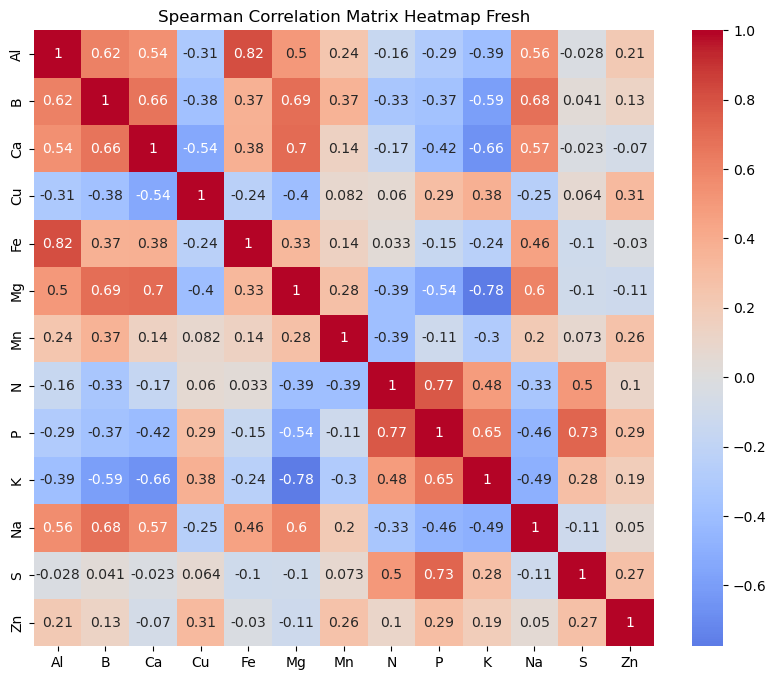

In [13]:
ds.generate_correlation_matrix(targets_df_fresh, method="spearman", leaf_state="fresh")

In [14]:
skewness_fresh_df = DataSummariser.summarize_skewness(targets_df_fresh)
skewness_fresh_df

Column  Skewness                Interpretation
0      Al  4.682736      Highly Positively Skewed
1       B  2.785116      Highly Positively Skewed
2      Ca  1.053944      Highly Positively Skewed
3      Cu  2.095270      Highly Positively Skewed
4      Fe  8.783293      Highly Positively Skewed
5      Mg  1.083892      Highly Positively Skewed
6      Mn  1.831605      Highly Positively Skewed
7       N -0.279548       Approximately Symmetric
8       P  0.908342  Moderately Positively Skewed
9       K -0.210807       Approximately Symmetric
10     Na  1.075338      Highly Positively Skewed
11      S  0.028913       Approximately Symmetric
12     Zn  2.857954      Highly Positively Skewed

In [8]:
outliers_fresh = ds.detect_outliers_iqr(targets_df_fresh)
outliers_fresh

Al    B     Ca     Cu     Fe     Mg     Mn    N      P    K     Na  \
0     3.0  136  159.0    3.0   41.0  157.0   33.0  NaN    8.0  NaN  163.0   
1     4.0  137  167.0   57.0   43.0  159.0   34.0  NaN    9.0  NaN  168.0   
2     5.0  138  168.0  102.0   44.0  169.0   39.0  NaN   11.0  NaN  239.0   
3     6.0  141  181.0  104.0   87.0  170.0   79.0  NaN   62.0  NaN    NaN   
4     7.0  148  182.0  201.0   97.0  171.0   80.0  NaN  274.0  NaN    NaN   
5     8.0  149  183.0  202.0  106.0    NaN   81.0  NaN  283.0  NaN    NaN   
6    14.0  150    NaN  207.0  135.0    NaN  152.0  NaN  288.0  NaN    NaN   
7    36.0  151    NaN  208.0  145.0    NaN    NaN  NaN    NaN  NaN    NaN   
8    41.0  152    NaN  212.0  148.0    NaN    NaN  NaN    NaN  NaN    NaN   
9    48.0  153    NaN  213.0  149.0    NaN    NaN  NaN    NaN  NaN    NaN   
10   87.0  154    NaN  217.0  150.0    NaN    NaN  NaN    NaN  NaN    NaN   
11  135.0  155    NaN  218.0  157.0    NaN    NaN  NaN    NaN  NaN    NaN   
12  148.0  156    NaN  222.0  160.0    NaN    NaN  NaN    NaN  NaN    NaN   
13  149.0  157    NaN  226.0  166.0    NaN    NaN  NaN    NaN  NaN    NaN   
14  150.0  158    NaN  227.0  167.0    NaN    NaN  NaN    NaN  NaN    NaN   
15  153.0  159    NaN  262.0  168.0    NaN    NaN  NaN    NaN  NaN    NaN   
16  157.0  160    NaN  267.0  172.0    NaN    NaN  NaN    NaN  NaN    NaN   
17  160.0  161    NaN  271.0  173.0    NaN    NaN  NaN    NaN  NaN    NaN   
18  163.0  162    NaN  272.0  174.0    NaN    NaN  NaN    NaN  NaN    NaN   
19  165.0  163    NaN  276.0  175.0    NaN    NaN  NaN    NaN  NaN    NaN   
20  166.0  164    NaN  281.0  176.0    NaN    NaN  NaN    NaN  NaN    NaN   
21  167.0  165    NaN  282.0  177.0    NaN    NaN  NaN    NaN  NaN    NaN   
22  168.0  166    NaN  286.0  178.0    NaN    NaN  NaN    NaN  NaN    NaN   
23  172.0  167    NaN  287.0  179.0    NaN    NaN  NaN    NaN  NaN    NaN   
24  173.0  168    NaN    NaN  180.0    NaN    NaN  NaN    NaN  NaN    NaN   
25  174.0  169    NaN    NaN  201.0    NaN    NaN  NaN    NaN  NaN    NaN   
26  175.0  170    NaN    NaN  206.0    NaN    NaN  NaN    NaN  NaN    NaN   
27  176.0  171    NaN    NaN  226.0    NaN    NaN  NaN    NaN  NaN    NaN   
28  177.0  172    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
29  178.0  173    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
30  179.0  174    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
31  180.0  175    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
32  206.0  176    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
33  226.0  177    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
34    NaN  178    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
35    NaN  179    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
36    NaN  180    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
37    NaN  181    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
38    NaN  182    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
39    NaN  183    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   
40    NaN  271    NaN    NaN    NaN    NaN    NaN  NaN    NaN  NaN    NaN   

      S     Zn  
0   NaN    0.0  
1   NaN    1.0  
2   NaN    2.0  
3   NaN    3.0  
4   NaN    4.0  
5   NaN    5.0  
6   NaN    8.0  
7   NaN    9.0  
8   NaN   10.0  
9   NaN   11.0  
10  NaN   21.0  
11  NaN   22.0  
12  NaN   39.0  
13  NaN   41.0  
14  NaN   44.0  
15  NaN   46.0  
16  NaN  156.0  
17  NaN    NaN  
18  NaN    NaN  
19  NaN    NaN  
20  NaN    NaN  
21  NaN    NaN  
22  NaN    NaN  
23  NaN    NaN  
24  NaN    NaN  
25  NaN    NaN  
26  NaN    NaN  
27  NaN    NaN  
28  NaN    NaN  
29  NaN    NaN  
30  NaN    NaN  
31  NaN    NaN  
32  NaN    NaN  
33  NaN    NaN  
34  NaN    NaN  
35  NaN    NaN  
36  NaN    NaN  
37  NaN    NaN  
38  NaN    NaN  
39  NaN    NaN  
40  NaN    NaN

In [9]:
unique_values = outliers_fresh.apply(lambda x: x.value_counts(dropna=True)).fillna(0).astype(int)
indices_df = pd.DataFrame(unique_values.sum(axis=1).sort_values(ascending=False))
indices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 168.0 to 288.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       101 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [8]:
scaled_dried_df = ds.min_max_scaler(targets_df_dried)
scaled_fresh_df = ds.min_max_scaler(targets_df_fresh)

In [9]:
scaled_dried_df['leaf_state']="dried"
scaled_fresh_df['leaf_state']="fresh"

In [10]:
dfmeltdried = pd.melt(scaled_dried_df, id_vars=['leaf_state'], value_vars=[col for col in scaled_dried_df.columns if col!="leaf_state"])
dfmeltfresh = pd.melt(scaled_fresh_df, id_vars=['leaf_state'], value_vars=[col for col in scaled_fresh_df.columns if col!="leaf_state"])
df_combined = pd.concat([dfmeltdried, dfmeltfresh], ignore_index=True)
sort = df_combined.sort_values(by="leaf_state", ascending=False)
ds.generate_violin_plot(df=sort,x='variable', y='value', hue='leaf_state', split=True, scatter=False, leaf_state="Dried s4 vs Fresh s3", figsize=(20,5))

In [11]:
df_combined = pd.concat([dfmeltdried, dfmeltfresh], ignore_index=True)
sort = df_combined.sort_values(by="leaf_state", ascending=False)

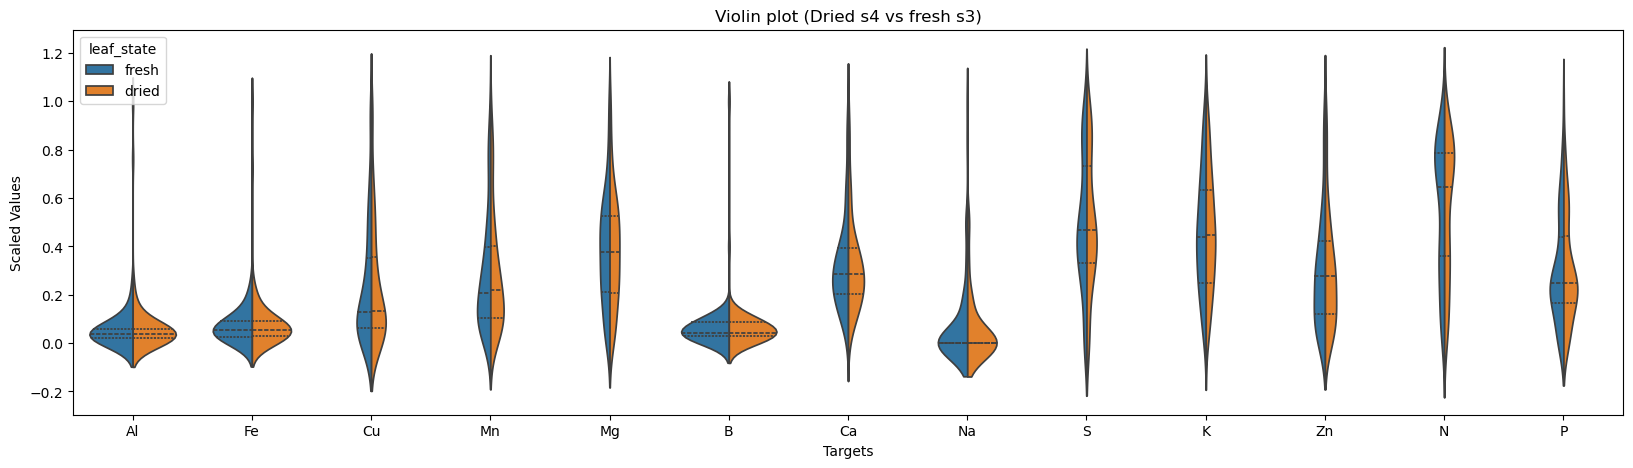

In [12]:
ds.generate_violin_plot(df=sort,x='variable', y='value', hue='leaf_state', split=True, scatter=False, leaf_state="Dried s4 vs Fresh s3", figsize=(20,5))

In [13]:
ds.save_graph("jpg",400)

## Season Basis

### Season 1

In [3]:
s1 = leaf_sample_reader.read_all_csvs(season=1)
s1 = DataCleaner.enforce_data_types(s1)
s1 = DataCleaner.drop_null_data(s1, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
s1 = DataCleaner.impute_data(s1, target_method=None, feature_method="neighbour_avg")

In [4]:
targets_df_s1 = leaf_sample_reader.extract_targets(s1)

In [5]:
targets_df_s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      73 non-null     float64
 1   B       73 non-null     float64
 2   Ca      79 non-null     float64
 3   Cl      67 non-null     float64
 4   Cu      79 non-null     int64  
 5   Mg      79 non-null     float64
 6   Mn      79 non-null     int64  
 7   N       79 non-null     float64
 8   P       78 non-null     float64
 9   K       79 non-null     float64
 10  Na      79 non-null     float64
 11  S       79 non-null     float64
 12  Zn      79 non-null     int64  
dtypes: float64(10), int64(3)
memory usage: 8.2 KB


In [6]:
targets_df_s1.describe()

Al          B         Ca         Cl         Cu         Mg  \
count    73.000000  73.000000  79.000000  67.000000  79.000000  79.000000   
mean    332.575342  34.438356   1.540127   1.830597   8.645570   0.747089   
std     535.942185   5.477191   0.395317   0.821753   5.835431   0.325856   
min      58.000000  22.000000   0.840000   0.830000   1.000000   0.300000   
25%      95.000000  32.000000   1.175000   1.180000   4.000000   0.475000   
50%     120.000000  35.000000   1.540000   1.620000   8.000000   0.690000   
75%     287.000000  39.000000   1.870000   2.210000  11.500000   1.070000   
max    2415.000000  44.000000   2.240000   3.620000  28.000000   1.430000   

                Mn          N          P          K         Na          S  \
count    79.000000  79.000000  78.000000  79.000000  79.000000  79.000000   
mean    457.000000   4.092785   0.228846   6.920000   0.022658   0.187215   
std     495.758885   1.024243   0.124983   2.201997   0.011952   0.042273   
min      32.000000   1.780000   0.070000   3.320000   0.000000   0.130000   
25%     104.000000   3.370000   0.130000   5.030000   0.010000   0.150000   
50%     233.000000   4.310000   0.210000   6.630000   0.020000   0.190000   
75%     702.000000   4.940000   0.280000   8.950000   0.030000   0.210000   
max    2545.000000   5.440000   0.510000  11.740000   0.050000   0.270000   

               Zn  
count   79.000000  
mean    90.974684  
std     65.295575  
min     13.000000  
25%     42.500000  
50%     73.000000  
75%    140.500000  
max    282.000000

In [7]:
scaled_s1 = ds.min_max_scaler(targets_df_s1)
scaled_s1['leaf_state']=s1['leaf_state']
dfmeltfresh = pd.melt(scaled_s1, id_vars=['leaf_state'], value_vars=[col for col in scaled_s1.columns if col!="leaf_state"])

In [8]:
sort = dfmeltfresh.sort_values(by="leaf_state", ascending=False)

In [9]:
ds.generate_violin_plot(df=sort,x='variable', y='value', hue='leaf_state', split=True, scatter=False, leaf_state="Dried vs Fresh S1", figsize=(20,5))

In [48]:
ds.save_graph("jpg", 400)

### Season 2

In [3]:
s2 = leaf_sample_reader.read_all_csvs(season=2)
s2 = DataCleaner.enforce_data_types(s2)
s2 = DataCleaner.drop_null_data(s2, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
s2 = DataCleaner.impute_data(s2, target_method=None, feature_method="neighbour_avg")

In [4]:
targets_df_s2 = leaf_sample_reader.extract_targets(s2)

In [5]:
targets_df_s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      288 non-null    int64  
 1   B       288 non-null    int64  
 2   Ca      288 non-null    float64
 3   Cu      288 non-null    int64  
 4   Fe      288 non-null    int64  
 5   Mg      288 non-null    float64
 6   Mn      288 non-null    int64  
 7   N       288 non-null    float64
 8   P       288 non-null    float64
 9   K       288 non-null    float64
 10  Na      288 non-null    float64
 11  S       288 non-null    float64
 12  Zn      288 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 29.4 KB


In [6]:
targets_df_s2.describe()

Al           B          Ca         Cu           Fe  \
count   288.000000  288.000000  288.000000  288.00000   288.000000   
mean    200.402778   50.645833    1.874653    7.50000   246.430556   
std     225.530836   39.726499    0.609744    6.06699   400.496341   
min       1.000000   13.000000    0.930000    1.00000    39.000000   
25%      70.500000   27.000000    1.380000    4.00000    90.000000   
50%     118.000000   32.000000    1.815000    6.00000   136.500000   
75%     233.000000   64.500000    2.145000   10.00000   248.000000   
max    1241.000000  228.000000    3.590000   52.00000  4307.000000   

               Mg           Mn           N           P           K  \
count  288.000000   288.000000  288.000000  288.000000  288.000000   
mean     0.904722   492.319444    3.587847    0.186181    6.630347   
std      0.414436   261.601598    0.895855    0.084655    2.386773   
min      0.220000   102.000000    1.590000    0.070000    2.050000   
25%      0.600000   282.250000    2.855000    0.110000    4.620000   
50%      0.850000   455.000000    3.705000    0.180000    6.425000   
75%      1.162500   640.500000    4.232500    0.250000    8.362500   
max      2.080000  1400.000000    5.500000    0.470000   12.260000   

               Na           S          Zn  
count  288.000000  288.000000  288.000000  
mean     0.028056    0.197639   43.034722  
std      0.016199    0.038163   20.902766  
min      0.000000    0.120000   11.000000  
25%      0.010000    0.170000   28.000000  
50%      0.030000    0.200000   37.000000  
75%      0.040000    0.222500   52.250000  
max      0.080000    0.290000  105.000000

In [7]:
ds.generate_correlation_matrix(targets_df_s2, method="spearman", leaf_state="fresh")

In [8]:
ds.save_graph

<bound method DataSummariser.save_graph of <spectroscopy.src.preprocessing.data_summariser.DataSummariser object at 0x000001988A840610>>

In [7]:
scaled_s2 = ds.min_max_scaler(targets_df_s2)
scaled_s2['leaf_state']=s2['leaf_state']
dfmeltfresh = pd.melt(scaled_s2, id_vars=['leaf_state'], value_vars=[col for col in scaled_s2.columns if col!="leaf_state"])
sort = dfmeltfresh.sort_values(by="leaf_state", ascending=False)

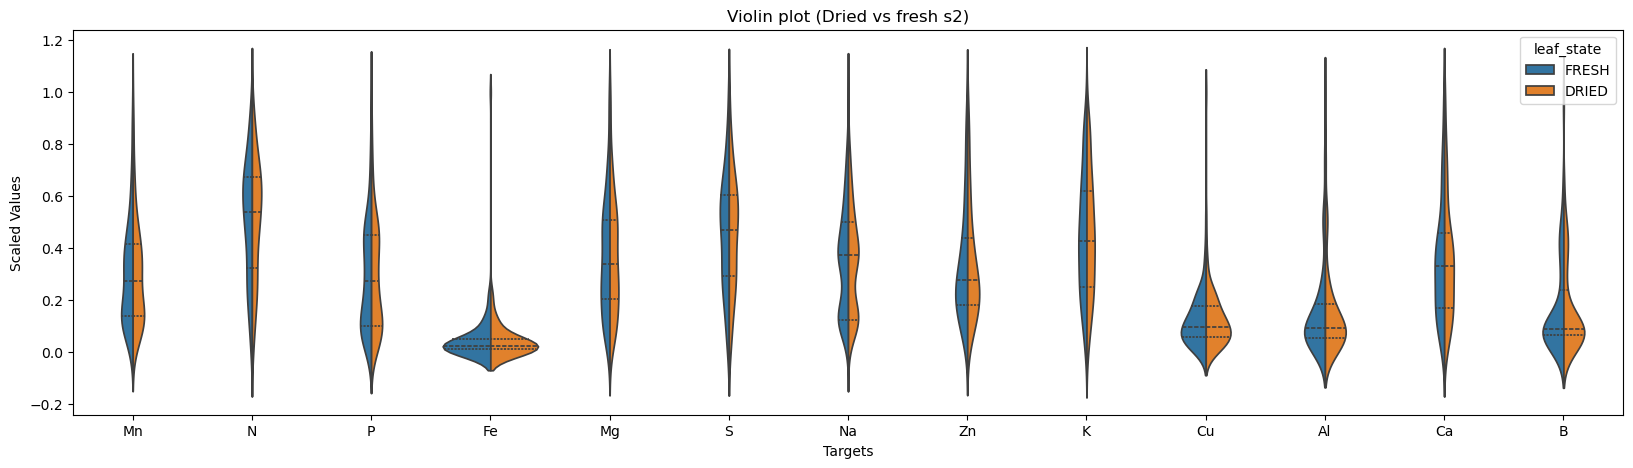

In [8]:
ds.generate_violin_plot(df=sort,x='variable', y='value', hue='leaf_state', split=True, scatter=False, leaf_state="Dried vs Fresh s2", figsize=(20,5))

In [9]:
ds.save_graph("jpg", 400)

### Season 3

In [10]:
s3 = leaf_sample_reader.read_all_csvs(season=3)
s3 = DataCleaner.enforce_data_types(s3)
s3 = DataCleaner.drop_null_data(s3, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
s3 = DataCleaner.impute_data(s3, target_method=None, feature_method="neighbour_avg")

In [11]:
targets_df_s3 = leaf_sample_reader.extract_targets(s3)

In [12]:
targets_df_s3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      203 non-null    float64
 1   B       203 non-null    float64
 2   Ca      203 non-null    float64
 3   Cu      203 non-null    float64
 4   Fe      203 non-null    float64
 5   Mg      203 non-null    float64
 6   Mn      203 non-null    float64
 7   N       202 non-null    float64
 8   P       203 non-null    float64
 9   K       203 non-null    float64
 10  Na      203 non-null    float64
 11  S       203 non-null    float64
 12  Zn      203 non-null    float64
dtypes: float64(13)
memory usage: 20.7 KB


In [13]:
targets_df_s3.describe()

Al           B          Ca          Cu           Fe  \
count  203.000000  203.000000  203.000000  203.000000   203.000000   
mean    50.577833   26.801232    1.310049   12.038522   123.468473   
std     71.506250    9.134440    0.410417   10.514560   117.852905   
min     11.100000   16.540000    0.620000    3.700000    44.000000   
25%     23.200000   20.005000    1.030000    5.800000    74.650000   
50%     35.000000   25.200000    1.220000    7.600000    92.000000   
75%     53.250000   31.000000    1.535000   13.380000   133.550000   
max    766.000000   98.880000    3.020000   61.700000  1301.000000   

               Mg           Mn           N           P           K  \
count  203.000000   203.000000  202.000000  203.000000  203.000000   
mean     0.630246   302.947291    3.390594    0.202759    7.933399   
std      0.273752   196.820067    1.173014    0.091388    1.840296   
min      0.230000    56.100000    1.210000    0.070000    3.630000   
25%      0.430000   162.400000    2.582500    0.140000    6.805000   
50%      0.550000   251.500000    3.100000    0.190000    8.130000   
75%      0.795000   387.450000    4.377500    0.240000    9.230000   
max      1.580000  1050.000000    6.040000    0.550000   13.250000   

               Na           S          Zn  
count  203.000000  203.000000  203.000000  
mean     0.013448    0.177241   35.669951  
std      0.008201    0.040763   23.459201  
min      0.010000    0.090000    8.000000  
25%      0.010000    0.150000   19.000000  
50%      0.010000    0.180000   30.000000  
75%      0.010000    0.210000   44.000000  
max      0.070000    0.270000  131.400000

In [14]:
scaled_s3 = ds.min_max_scaler(targets_df_s3)
scaled_s3['leaf_state']=s3['leaf_state']
dfm = pd.melt(scaled_s3, id_vars=['leaf_state'], value_vars=[col for col in scaled_s3.columns if col!="leaf_state"])
sort = dfm.sort_values(by="leaf_state", ascending=False)

In [15]:
ds.generate_violin_plot(df=sort,x='variable', y='value', hue='leaf_state', split=True, scatter=False, leaf_state="Dried vs Fresh s3", figsize=(20,5))

In [16]:
ds.save_graph("jpg", 400)

## File basis

### Dried 1

In [19]:
d1 = leaf_sample_reader.read_all_csvs(leaf_state="dried", season=1)
d1 = DataCleaner.enforce_data_types(d1)
d1 = DataCleaner.drop_null_data(d1, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
d1 = DataCleaner.impute_data(d1, target_method=None, feature_method="neighbour_avg")

In [20]:
d1_targets = leaf_sample_reader.extract_targets(d1)

In [21]:
d1_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      36 non-null     float64
 1   B       36 non-null     float64
 2   Ca      39 non-null     float64
 3   Cu      39 non-null     int64  
 4   Fe      39 non-null     int64  
 5   Mg      39 non-null     float64
 6   Mn      39 non-null     int64  
 7   N       39 non-null     float64
 8   P       38 non-null     float64
 9   K       39 non-null     float64
 10  Na      39 non-null     float64
 11  S       39 non-null     float64
 12  Zn      39 non-null     int64  
dtypes: float64(9), int64(4)
memory usage: 4.1 KB


In [6]:
d1_targets.describe()

Al          B         Ca         Cl         Cu           Fe  \
count    36.000000  36.000000  39.000000  33.000000  39.000000    39.000000   
mean    335.916667  34.472222   1.539231   1.836667   8.717949   347.974359   
std     542.772900   5.547129   0.400404   0.832968   5.875680   700.220961   
min      58.000000  22.000000   0.840000   0.830000   1.000000    50.000000   
25%      95.750000  31.750000   1.175000   1.180000   4.000000    80.000000   
50%     128.000000  35.000000   1.540000   1.620000   8.000000   119.000000   
75%     294.500000  39.000000   1.870000   2.210000  11.500000   202.500000   
max    2415.000000  44.000000   2.240000   3.620000  28.000000  3343.000000   

              Mg           Mn          N          P          K         Na  \
count  39.000000    39.000000  39.000000  38.000000  39.000000  39.000000   
mean    0.742308   460.128205   4.103846   0.231053   6.960513   0.022564   
std     0.327297   501.449173   1.032841   0.126721   2.200753   0.012078   
min     0.300000    32.000000   1.780000   0.070000   3.320000   0.000000   
25%     0.475000   104.000000   3.390000   0.130000   5.030000   0.010000   
50%     0.690000   233.000000   4.310000   0.210000   6.630000   0.020000   
75%     1.030000   702.000000   4.940000   0.280000   8.950000   0.030000   
max     1.430000  2545.000000   5.440000   0.510000  11.740000   0.050000   

               S          Zn  
count  39.000000   39.000000  
mean    0.187949   91.589744  
std     0.042313   65.916901  
min     0.130000   13.000000  
25%     0.150000   42.500000  
50%     0.190000   73.000000  
75%     0.210000  140.500000  
max     0.270000  282.000000

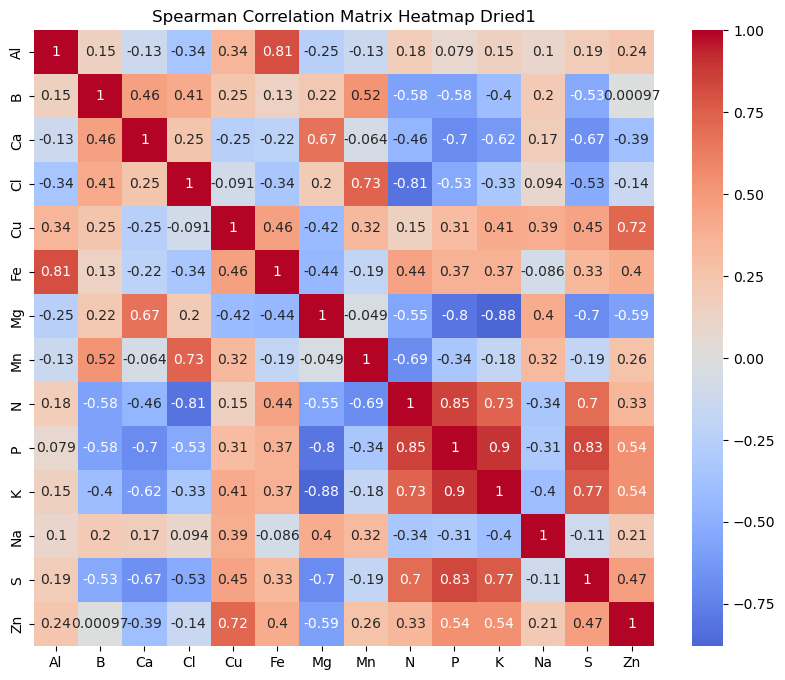

In [7]:
ds.generate_correlation_matrix(d1_targets, method="spearman", leaf_state="dried", season=1)

In [8]:
ds.save_graph()

In [7]:
scaled_d1 = ds.min_max_scaler(d1_targets)

In [8]:
skewness_d1 = DataSummariser.summarize_skewness(d1_targets)
skewness_d1

Column  Skewness                Interpretation
0      Al  3.103710      Highly Positively Skewed
1       B -0.471181       Approximately Symmetric
2      Ca  0.133163       Approximately Symmetric
3      Cl  0.794353  Moderately Positively Skewed
4      Cu  1.198134      Highly Positively Skewed
5      Fe  3.469606      Highly Positively Skewed
6      Mg  0.493725       Approximately Symmetric
7      Mn  2.146360      Highly Positively Skewed
8       N -0.690962  Moderately Negatively Skewed
9       P  0.696815  Moderately Positively Skewed
10      K  0.179791       Approximately Symmetric
11     Na  0.609220  Moderately Positively Skewed
12      S  0.486607       Approximately Symmetric
13     Zn  1.063201      Highly Positively Skewed

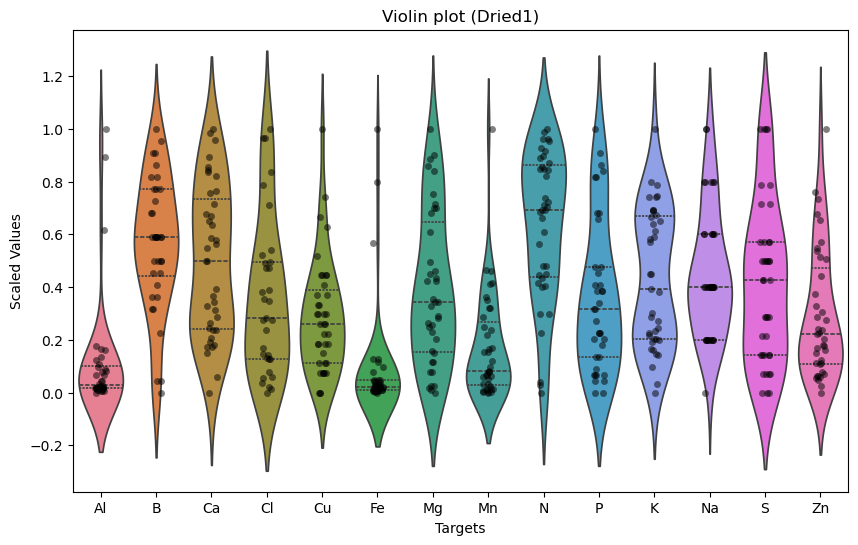

In [11]:
ds.generate_violin_plot(df=scaled_d1, leaf_state="dried", season=1, figsize=(10,6))

In [12]:
ds.save_graph()

In [9]:
outliers_d1 = ds.detect_outliers_iqr(d1_targets)
outliers_d1

Al    B   Ca   Cl   Cu  Fe   Mg    Mn    N     P    K   Na    S   Zn
0  3.0  NaN  NaN  NaN  3.0   3  NaN  38.0  NaN  11.0  NaN  NaN  NaN  NaN
1  4.0  NaN  NaN  NaN  NaN   4  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN
2  5.0  NaN  NaN  NaN  NaN   5  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  NaN  NaN   6  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN   7  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  NaN   8  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN

In [10]:
unique_values = outliers_d1.apply(lambda x: x.value_counts(dropna=True)).fillna(0).astype(int)
indices_df = pd.DataFrame(unique_values.sum(axis=1).sort_values(ascending=False))
indices_df

0
3.0   3
4.0   2
5.0   2
6.0   1
7.0   1
8.0   1
11.0  1
38.0  1

### Dried 2

In [31]:
d2 = leaf_sample_reader.read_all_csvs(leaf_state="dried", season=2)
d2 = DataCleaner.enforce_data_types(d2)
d2 = DataCleaner.drop_null_data(d2, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
d2 = DataCleaner.impute_data(d2, target_method=None, feature_method="neighbour_avg")

In [32]:
d2_targets = leaf_sample_reader.extract_targets(d2)

In [33]:
d2_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      144 non-null    int64  
 1   B       144 non-null    int64  
 2   Ca      144 non-null    float64
 3   Cu      144 non-null    int64  
 4   Fe      144 non-null    int64  
 5   Mg      144 non-null    float64
 6   Mn      144 non-null    int64  
 7   N       144 non-null    float64
 8   P       144 non-null    float64
 9   K       144 non-null    float64
 10  Na      144 non-null    float64
 11  S       144 non-null    float64
 12  Zn      144 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 14.8 KB


In [34]:
d2_targets.describe()

Al           B          Ca          Cu           Fe  \
count   144.000000  144.000000  144.000000  144.000000   144.000000   
mean    200.402778   50.645833    1.874653    7.500000   246.430556   
std     225.924776   39.795890    0.610809    6.077587   401.195899   
min       1.000000   13.000000    0.930000    1.000000    39.000000   
25%      70.500000   27.000000    1.380000    4.000000    90.000000   
50%     118.000000   32.000000    1.815000    6.000000   136.500000   
75%     233.000000   64.500000    2.145000   10.000000   248.000000   
max    1241.000000  228.000000    3.590000   52.000000  4307.000000   

               Mg           Mn           N           P           K  \
count  144.000000   144.000000  144.000000  144.000000  144.000000   
mean     0.904722   492.319444    3.587847    0.186181    6.630347   
std      0.415160   262.058544    0.897420    0.084803    2.390942   
min      0.220000   102.000000    1.590000    0.070000    2.050000   
25%      0.600000   282.250000    2.855000    0.110000    4.620000   
50%      0.850000   455.000000    3.705000    0.180000    6.425000   
75%      1.162500   640.500000    4.232500    0.250000    8.362500   
max      2.080000  1400.000000    5.500000    0.470000   12.260000   

               Na           S          Zn  
count  144.000000  144.000000  144.000000  
mean     0.028056    0.197639   43.034722  
std      0.016227    0.038230   20.939277  
min      0.000000    0.120000   11.000000  
25%      0.010000    0.170000   28.000000  
50%      0.030000    0.200000   37.000000  
75%      0.040000    0.222500   52.250000  
max      0.080000    0.290000  105.000000

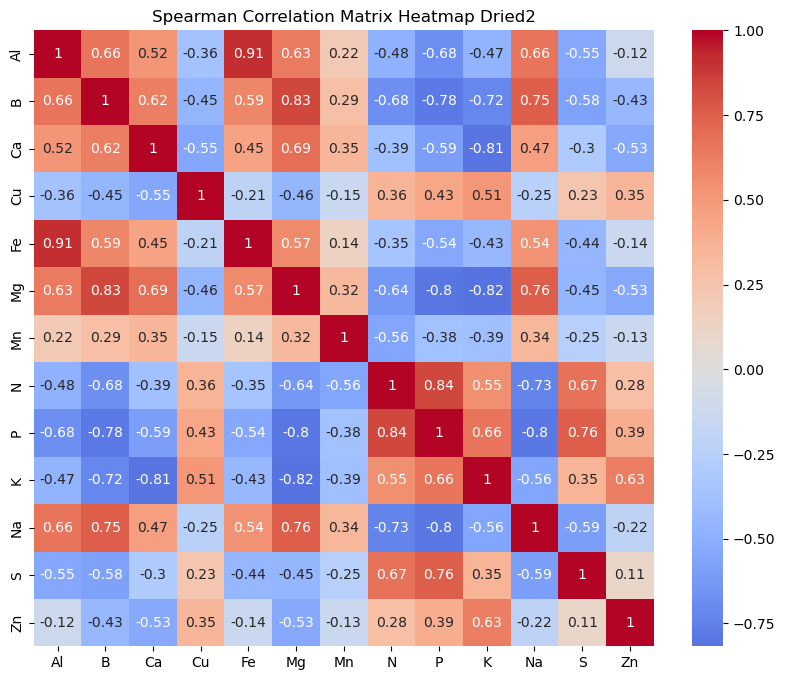

In [19]:
ds.generate_correlation_matrix(d2_targets, method="spearman", leaf_state="dried", season=2)

In [20]:
ds.save_graph()

In [35]:
scaled_d2 = ds.min_max_scaler(d2_targets)
skewness_d2 = DataSummariser.summarize_skewness(d2_targets)
skewness_d2

Column  Skewness                Interpretation
0      Al  2.201270      Highly Positively Skewed
1       B  1.854227      Highly Positively Skewed
2      Ca  0.821787  Moderately Positively Skewed
3      Cu  3.366476      Highly Positively Skewed
4      Fe  7.597069      Highly Positively Skewed
5      Mg  0.583826  Moderately Positively Skewed
6      Mn  0.970022  Moderately Positively Skewed
7       N -0.260731       Approximately Symmetric
8       P  0.774494  Moderately Positively Skewed
9       K  0.222555       Approximately Symmetric
10     Na  0.528935  Moderately Positively Skewed
11      S  0.055121       Approximately Symmetric
12     Zn  1.026899      Highly Positively Skewed

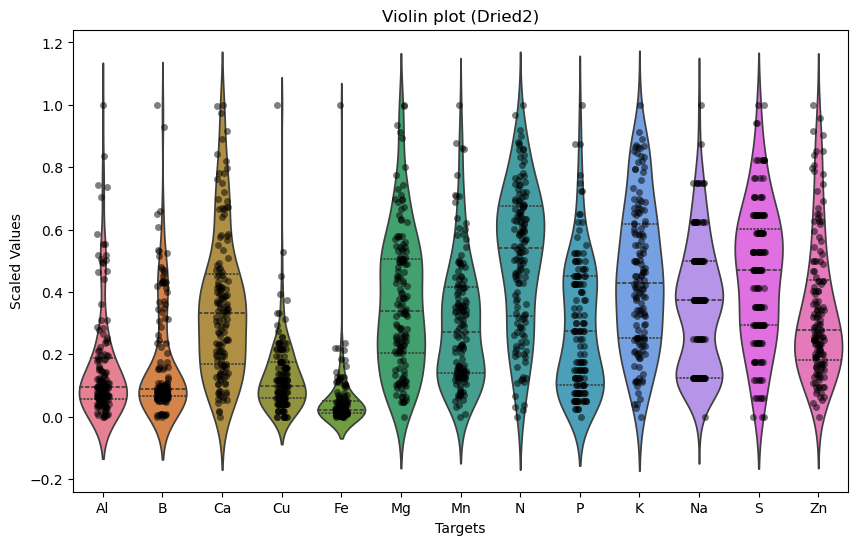

In [24]:
ds.generate_violin_plot(df=scaled_d2, leaf_state="dried", season=2, figsize=(10,6))

In [25]:
ds.save_graph()

In [36]:
outliers_d2 = ds.detect_outliers_iqr(d2_targets)
outliers_d2

Al      B     Ca    Cu   Fe     Mg     Mn    N     P    K   Na    S  \
0     1.0  108.0  119.0   1.0    1  117.0   39.0  NaN  22.0  NaN  NaN  NaN   
1    95.0  110.0  128.0  17.0    3  130.0   40.0  NaN   NaN  NaN  NaN  NaN   
2   108.0  117.0  141.0  62.0    4    NaN   41.0  NaN   NaN  NaN  NaN  NaN   
3   109.0  118.0  142.0  64.0   47    NaN  112.0  NaN   NaN  NaN  NaN  NaN   
4   110.0  126.0  143.0  65.0   57    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
5   120.0  127.0    NaN   NaN   95    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
6   126.0  128.0    NaN   NaN  108    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
7   127.0  131.0    NaN   NaN  109    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
8   128.0  135.0    NaN   NaN  110    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
9   132.0    NaN    NaN   NaN  117    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
10  133.0    NaN    NaN   NaN  120    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
11  134.0    NaN    NaN   NaN  126    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
12  135.0    NaN    NaN   NaN  127    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
13  137.0    NaN    NaN   NaN  128    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
14  138.0    NaN    NaN   NaN  132    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
15  139.0    NaN    NaN   NaN  133    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
16  140.0    NaN    NaN   NaN  134    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
17    NaN    NaN    NaN   NaN  137    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
18    NaN    NaN    NaN   NaN  140    NaN    NaN  NaN   NaN  NaN  NaN  NaN   

       Zn  
0     1.0  
1     4.0  
2     6.0  
3    15.0  
4    16.0  
5    17.0  
6   116.0  
7     NaN  
8     NaN  
9     NaN  
10    NaN  
11    NaN  
12    NaN  
13    NaN  
14    NaN  
15    NaN  
16    NaN  
17    NaN  
18    NaN

In [37]:
unique_values = outliers_d2.apply(lambda x: x.value_counts(dropna=True)).fillna(0).astype(int)

In [38]:
indices_df = pd.DataFrame(unique_values.sum(axis=1).sort_values(ascending=False))

In [39]:
indices_df

0
1.0    4
128.0  4
108.0  3
117.0  3
127.0  3
110.0  3
126.0  3
133.0  2
137.0  2
135.0  2
134.0  2
120.0  2
132.0  2
4.0    2
95.0   2
17.0   2
109.0  2
140.0  2
141.0  1
142.0  1
139.0  1
138.0  1
131.0  1
130.0  1
116.0  1
119.0  1
41.0   1
6.0    1
15.0   1
16.0   1
22.0   1
39.0   1
40.0   1
47.0   1
118.0  1
57.0   1
62.0   1
64.0   1
65.0   1
112.0  1
3.0    1
143.0  1

In [90]:
df = d2_targets.drop(list(indices_df.loc[indices_df[0]>3].index))
ds.generate_correlation_matrix(df, method="spearman", leaf_state="dried", season=2)

### Dried 3 

In [25]:
d3 = leaf_sample_reader.read_all_csvs(leaf_state="dried", season=3)
d3 = DataCleaner.enforce_data_types(d3)
d3 = DataCleaner.drop_null_data(d3, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
d3 = DataCleaner.impute_data(d3, target_method=None, feature_method="neighbour_avg")

In [26]:
d3_targets = leaf_sample_reader.extract_targets(d3)

In [27]:
d3_targets.describe()

Al          B         Ca         Cu          Fe         Mg  \
count   98.00000  98.000000  98.000000  98.000000   98.000000  98.000000   
mean    38.07449  32.024490   1.495816  10.187755   96.388776   0.809796   
std     31.12454   6.536623   0.422364  10.742567   44.081251   0.267928   
min     11.10000  22.800000   0.960000   3.700000   56.000000   0.350000   
25%     19.62500  27.825000   1.200000   5.400000   68.400000   0.582500   
50%     26.95000  31.000000   1.430000   6.700000   80.600000   0.750000   
75%     43.15000  34.200000   1.657500   9.300000  111.575000   1.015000   
max    156.70000  61.600000   3.020000  61.700000  264.200000   1.580000   

               Mn          N          P          K         Na          S  \
count   98.000000  98.000000  98.000000  98.000000  98.000000  98.000000   
mean   253.370408   2.880510   0.189796   7.371327   0.012347   0.192245   
std    124.951955   0.589101   0.069653   2.113541   0.004495   0.034328   
min     56.100000   1.830000   0.080000   3.630000   0.010000   0.120000   
25%    160.250000   2.552500   0.132500   5.535000   0.010000   0.170000   
50%    237.550000   2.870000   0.190000   7.705000   0.010000   0.200000   
75%    345.200000   3.277500   0.220000   8.677500   0.010000   0.220000   
max    516.800000   4.380000   0.360000  13.250000   0.030000   0.270000   

               Zn  
count   98.000000  
mean    41.295918  
std     26.833396  
min     13.300000  
25%     22.900000  
50%     31.450000  
75%     48.025000  
max    131.400000

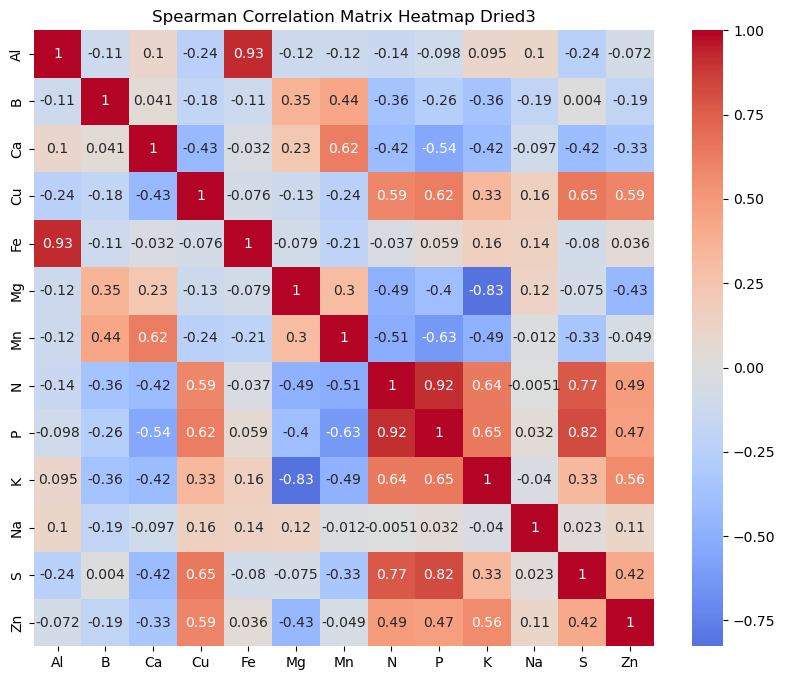

In [94]:
ds.generate_correlation_matrix(d3_targets, method="spearman", leaf_state="dried", season=3)

In [95]:
ds.save_graph()

In [28]:
scaled_d3 = ds.min_max_scaler(d3_targets)
skewness_d3 = DataSummariser.summarize_skewness(d3_targets)
skewness_d3

Column  Skewness                Interpretation
0      Al  2.337781      Highly Positively Skewed
1       B  2.524937      Highly Positively Skewed
2      Ca  1.440391      Highly Positively Skewed
3      Cu  3.280071      Highly Positively Skewed
4      Fe  2.213523      Highly Positively Skewed
5      Mg  0.301412       Approximately Symmetric
6      Mn  0.437118       Approximately Symmetric
7       N  0.063026       Approximately Symmetric
8       P  0.630225  Moderately Positively Skewed
9       K  0.144335       Approximately Symmetric
10     Na  1.613960      Highly Positively Skewed
11      S -0.388396       Approximately Symmetric
12     Zn  1.530742      Highly Positively Skewed

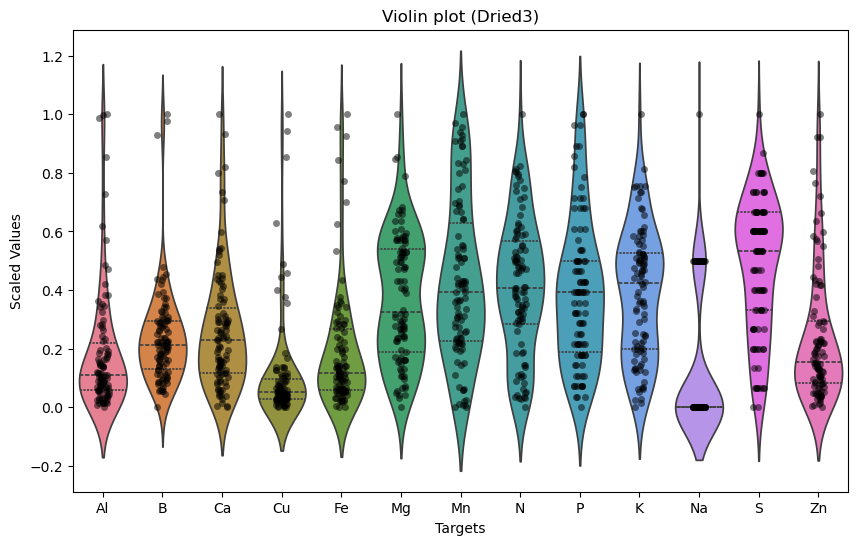

In [97]:
ds.generate_violin_plot(df=scaled_d3, leaf_state="dried", season=3, figsize=(10,6))

In [98]:
ds.save_graph()

In [29]:
outliers_d3 = ds.detect_outliers_iqr(d3_targets)
outliers_d3

Al     B    Ca    Cu    Fe   Mg   Mn     N     P    K  Na    S    Zn
0    4.0  83.0   8.0  38.0  20.0  NaN  NaN  49.0  39.0  NaN   3  NaN  38.0
1   20.0  89.0  19.0  42.0  23.0  NaN  NaN   NaN  74.0  NaN   5  NaN  42.0
2   23.0  95.0  20.0  46.0  47.0  NaN  NaN   NaN   NaN  NaN   8  NaN  46.0
3   47.0   NaN  22.0  53.0  48.0  NaN  NaN   NaN   NaN  NaN  27  NaN  56.0
4   48.0   NaN  23.0  57.0  49.0  NaN  NaN   NaN   NaN  NaN  30  NaN  58.0
5   49.0   NaN  25.0  58.0  85.0  NaN  NaN   NaN   NaN  NaN  36  NaN  82.0
6   68.0   NaN   NaN  61.0  92.0  NaN  NaN   NaN   NaN  NaN  40  NaN  91.0
7   85.0   NaN   NaN  77.0   NaN  NaN  NaN   NaN   NaN  NaN  42  NaN  94.0
8   92.0   NaN   NaN  82.0   NaN  NaN  NaN   NaN   NaN  NaN  44  NaN   NaN
9    NaN   NaN   NaN  88.0   NaN  NaN  NaN   NaN   NaN  NaN  48  NaN   NaN
10   NaN   NaN   NaN  94.0   NaN  NaN  NaN   NaN   NaN  NaN  59  NaN   NaN
11   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  63  NaN   NaN
12   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  64  NaN   NaN
13   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  67  NaN   NaN
14   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  69  NaN   NaN
15   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  70  NaN   NaN
16   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  75  NaN   NaN
17   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  76  NaN   NaN
18   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  80  NaN   NaN
19   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  82  NaN   NaN
20   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  88  NaN   NaN
21   NaN   NaN   NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  94  NaN   NaN

In [30]:
unique_values = outliers_d3.apply(lambda x: x.value_counts(dropna=True)).fillna(0).astype(int)
indices_df = pd.DataFrame(unique_values.sum(axis=1).sort_values(ascending=False))

In [32]:
indices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 49.0 to 95.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       47 non-null     int64
dtypes: int64(1)
memory usage: 752.0 bytes


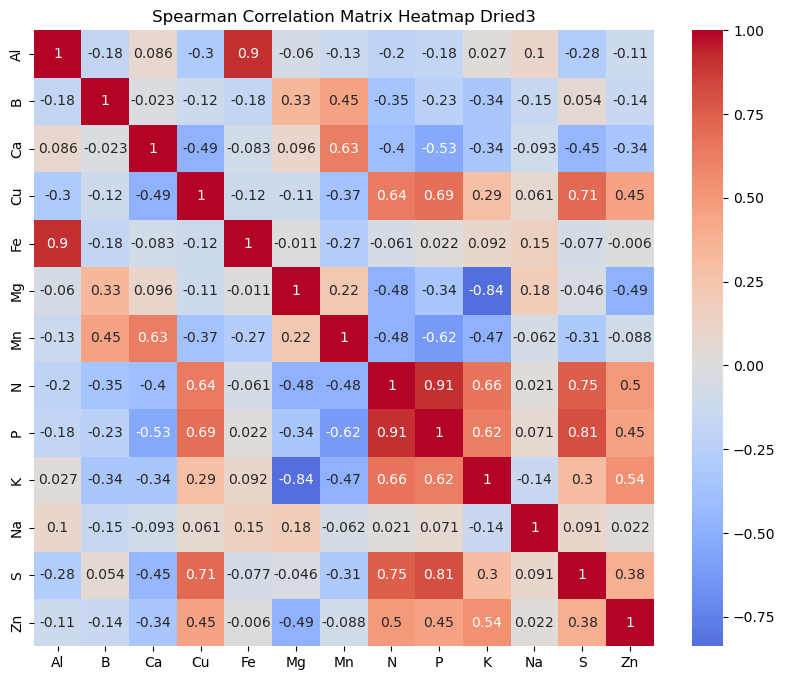

In [120]:
df = d3_targets.drop(list(indices_df.loc[indices_df[0]>1].index))
ds.generate_correlation_matrix(df, method="spearman", leaf_state="dried", season=3)

### Dried 4

In [33]:
d4 = leaf_sample_reader.read_all_csvs(leaf_state="dried", season=4)
d4 = DataCleaner.enforce_data_types(d4)
d4 = DataCleaner.drop_null_data(d4, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
d4 = DataCleaner.impute_data(d4, target_method=None, feature_method="neighbour_avg")

In [34]:
d4_targets = leaf_sample_reader.extract_targets(d4)

In [35]:
d4_targets.describe()

Al           B          Ca          Cu           Fe  \
count  104.000000  104.000000  104.000000  104.000000   104.000000   
mean    62.509615   21.952115    1.135673   13.858462   149.451923   
std     93.917852    8.552217    0.314259   10.046351   154.942074   
min     13.000000   16.540000    0.620000    4.140000    44.000000   
25%     30.000000   18.992500    0.937500    6.695000    80.250000   
50%     41.500000   20.130000    1.070000    9.520000   114.500000   
75%     58.000000   23.572500    1.240000   18.345000   157.250000   
max    766.000000   98.880000    2.200000   44.230000  1301.000000   

               Mg           Mn           N          P           K          Na  \
count  104.000000   104.000000  103.000000  104.00000  104.000000  104.000000   
mean     0.462212   351.355769    3.880097    0.21625    8.469327    0.014519   
std      0.141572   237.198533    1.373923    0.10628    1.356569    0.010509   
min      0.230000    69.000000    1.210000    0.07000    5.910000    0.010000   
25%      0.357500   171.750000    2.945000    0.15000    7.280000    0.010000   
50%      0.460000   284.000000    4.350000    0.19000    8.380000    0.010000   
75%      0.550000   462.250000    5.020000    0.28250    9.427500    0.010000   
max      0.840000  1050.000000    6.040000    0.55000   11.450000    0.070000   

                S          Zn  
count  104.000000  104.000000  
mean     0.163942   30.634615  
std      0.041017   18.386391  
min      0.090000    8.000000  
25%      0.140000   17.000000  
50%      0.160000   29.000000  
75%      0.200000   40.250000  
max      0.240000   84.000000

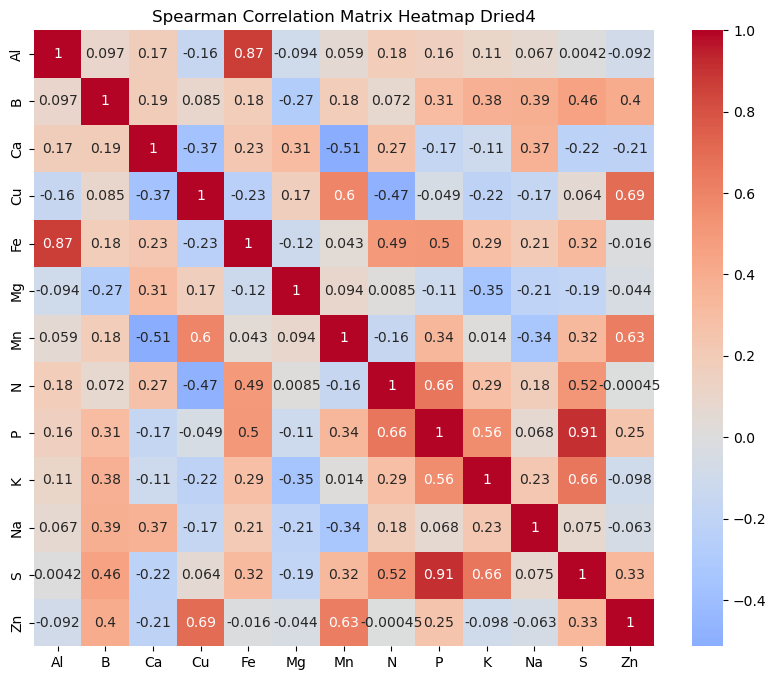

In [114]:
ds.generate_correlation_matrix(d4_targets, method="spearman", leaf_state="dried", season=4)

In [115]:
ds.save_graph()

In [36]:
scaled_d4 = ds.min_max_scaler(d4_targets)
skewness_d4 = DataSummariser.summarize_skewness(d4_targets)
skewness_d4

Column  Skewness                Interpretation
0      Al  5.944471      Highly Positively Skewed
1       B  7.509288      Highly Positively Skewed
2      Ca  1.294309      Highly Positively Skewed
3      Cu  1.342724      Highly Positively Skewed
4      Fe  5.494319      Highly Positively Skewed
5      Mg  0.434299       Approximately Symmetric
6      Mn  1.154225      Highly Positively Skewed
7       N -0.428065       Approximately Symmetric
8       P  0.801889  Moderately Positively Skewed
9       K  0.223271       Approximately Symmetric
10     Na  3.046096      Highly Positively Skewed
11      S  0.112069       Approximately Symmetric
12     Zn  1.031793      Highly Positively Skewed

In [117]:
ds.generate_violin_plot(df=scaled_d4, leaf_state="dried", season=4, figsize=(10,6))

In [118]:
ds.save_graph()

In [37]:
outliers_d4 = ds.detect_outliers_iqr(d4_targets)
outliers_d4

Al     B    Ca    Cu    Fe    Mg    Mn    N     P    K  Na    S    Zn
0    16.0  86.0   0.0  17.0  16.0  16.0  30.0  NaN  98.0  NaN   0  NaN  34.0
1    21.0  93.0   2.0  22.0  21.0   NaN  34.0  NaN   NaN  NaN   3  NaN  39.0
2    29.0   NaN   5.0  27.0  29.0   NaN  39.0  NaN   NaN  NaN   5  NaN  82.0
3    34.0   NaN  10.0  42.0  34.0   NaN  42.0  NaN   NaN  NaN   8  NaN   NaN
4    39.0   NaN  76.0  86.0  39.0   NaN   NaN  NaN   NaN  NaN  10  NaN   NaN
5    41.0   NaN  81.0   NaN  41.0   NaN   NaN  NaN   NaN  NaN  13  NaN   NaN
6    57.0   NaN   NaN   NaN  86.0   NaN   NaN  NaN   NaN  NaN  14  NaN   NaN
7    86.0   NaN   NaN   NaN  98.0   NaN   NaN  NaN   NaN  NaN  18  NaN   NaN
8    98.0   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  19  NaN   NaN
9   103.0   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  23  NaN   NaN
10    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  24  NaN   NaN
11    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  28  NaN   NaN
12    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  44  NaN   NaN
13    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  49  NaN   NaN
14    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  50  NaN   NaN
15    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  54  NaN   NaN
16    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  57  NaN   NaN
17    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  59  NaN   NaN
18    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  62  NaN   NaN
19    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  64  NaN   NaN
20    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  69  NaN   NaN
21    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  86  NaN   NaN
22    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  93  NaN   NaN
23    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  98  NaN   NaN

In [38]:
unique_values = outliers_d4.apply(lambda x: x.value_counts(dropna=True)).fillna(0).astype(int)
indices_df = pd.DataFrame(unique_values.sum(axis=1).sort_values(ascending=False))

In [40]:
indices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 86.0 to 103.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       40 non-null     int64
dtypes: int64(1)
memory usage: 640.0 bytes


### Fresh 1

In [41]:
f1 = leaf_sample_reader.read_all_csvs(leaf_state="fresh", season=1)
f1 = DataCleaner.enforce_data_types(f1)
f1 = DataCleaner.drop_null_data(f1, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
f1 = DataCleaner.impute_data(f1, target_method=None, feature_method="neighbour_avg")

In [42]:
f1_targets = leaf_sample_reader.extract_targets(f1)

In [43]:
f1_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      37 non-null     float64
 1   B       37 non-null     float64
 2   Ca      40 non-null     float64
 3   Cu      40 non-null     int64  
 4   Mg      40 non-null     float64
 5   Mn      40 non-null     int64  
 6   N       40 non-null     float64
 7   P       40 non-null     float64
 8   K       40 non-null     float64
 9   Na      40 non-null     float64
 10  S       40 non-null     float64
 11  Zn      40 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 3.9 KB


In [126]:
f1_targets.describe()

Al          B         Ca         Cu         Mg           Mn  \
count    37.000000  37.000000  40.000000  40.000000  40.000000    40.000000   
mean    329.324324  34.405405   1.541000   8.575000   0.751750   453.950000   
std     536.681473   5.484622   0.395395   5.869904   0.328547   496.518492   
min      58.000000  22.000000   0.840000   1.000000   0.300000    32.000000   
25%      95.000000  32.000000   1.177500   4.000000   0.477500   107.500000   
50%     120.000000  35.000000   1.575000   8.000000   0.690000   231.500000   
75%     287.000000  39.000000   1.855000  11.250000   1.075000   677.000000   
max    2415.000000  44.000000   2.240000  28.000000   1.430000  2545.000000   

               N          P          K        Na          S          Zn  
count  40.000000  40.000000  40.000000  40.00000  40.000000   40.000000  
mean    4.082000   0.226750   6.880500   0.02275   0.186500   90.375000  
std     1.028834   0.124887   2.230518   0.01198   0.042761   65.518323  
min     1.780000   0.070000   3.320000   0.00000   0.130000   13.000000  
25%     3.352500   0.130000   5.020000   0.01000   0.150000   42.750000  
50%     4.310000   0.200000   6.580000   0.02000   0.190000   70.500000  
75%     4.925000   0.280000   8.935000   0.03000   0.210000  136.250000  
max     5.440000   0.510000  11.740000   0.05000   0.270000  282.000000

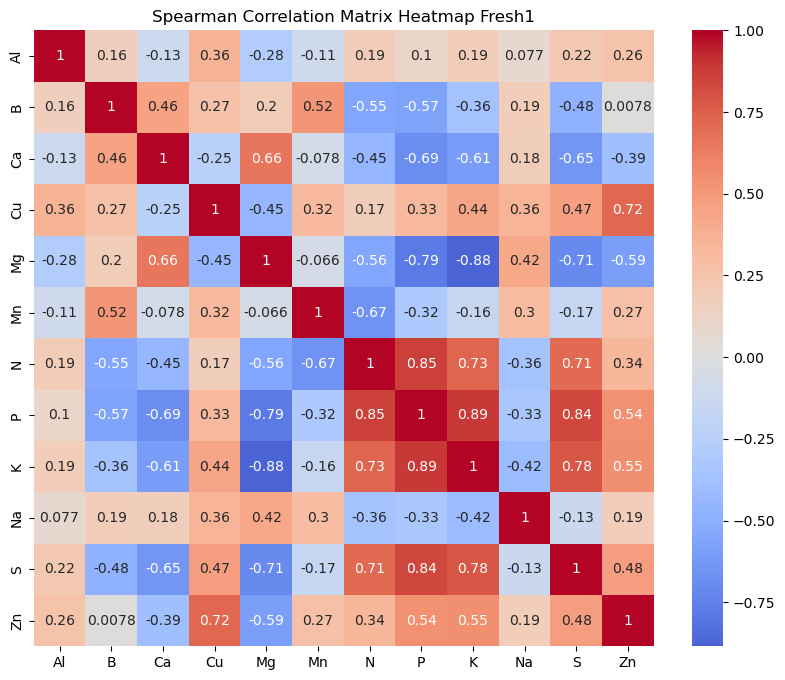

In [127]:
ds.generate_correlation_matrix(f1_targets, method="spearman", leaf_state="fresh", season=1)

In [128]:
ds.save_graph()

In [44]:
scaled_f1 = ds.min_max_scaler(f1_targets)
skewness_f1 = DataSummariser.summarize_skewness(f1_targets)
skewness_f1

Column  Skewness                Interpretation
0      Al  3.152661      Highly Positively Skewed
1       B -0.437233       Approximately Symmetric
2      Ca  0.120584       Approximately Symmetric
3      Cu  1.221253      Highly Positively Skewed
4      Mg  0.425177       Approximately Symmetric
5      Mn  2.187311      Highly Positively Skewed
6       N -0.629697  Moderately Negatively Skewed
7       P  0.779725  Moderately Positively Skewed
8       K  0.201627       Approximately Symmetric
9      Na  0.564917  Moderately Positively Skewed
10      S  0.498645       Approximately Symmetric
11     Zn  1.101084      Highly Positively Skewed

In [130]:
ds.generate_violin_plot(df=scaled_f1, leaf_state="fresh", season=1, figsize=(10,6))

In [131]:
ds.save_graph()

In [45]:
outliers_f1 = ds.detect_outliers_iqr(f1_targets)
outliers_f1

Al    B   Ca   Cu   Mg    Mn    N     P    K   Na    S   Zn
0   3  NaN  NaN  3.0  NaN  39.0  NaN  11.0  NaN  NaN  NaN  3.0
1   4  NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN
2   5  NaN  NaN  NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN  NaN

In [46]:
unique_values = outliers_f1.apply(lambda x: x.value_counts(dropna=True)).fillna(0).astype(int)
indices_df = pd.DataFrame(unique_values.sum(axis=1).sort_values(ascending=False))

In [47]:
indices_df

0
3.0   3
4.0   1
5.0   1
11.0  1
39.0  1

### Fresh 2

In [22]:
f2 = leaf_sample_reader.read_all_csvs(leaf_state="fresh", season=2)
f2 = DataCleaner.enforce_data_types(f2)
f2 = DataCleaner.drop_null_data(f2, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
f2 = DataCleaner.impute_data(f2, target_method=None, feature_method="neighbour_avg")

In [23]:
f2_targets = leaf_sample_reader.extract_targets(f2)

In [24]:
f2_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      144 non-null    int64  
 1   B       144 non-null    int64  
 2   Ca      144 non-null    float64
 3   Cu      144 non-null    int64  
 4   Fe      144 non-null    int64  
 5   Mg      144 non-null    float64
 6   Mn      144 non-null    int64  
 7   N       144 non-null    float64
 8   P       144 non-null    float64
 9   K       144 non-null    float64
 10  Na      144 non-null    float64
 11  S       144 non-null    float64
 12  Zn      144 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 14.8 KB


In [25]:
f2_targets.describe()

Al           B          Ca          Cu           Fe  \
count   144.000000  144.000000  144.000000  144.000000   144.000000   
mean    200.402778   50.645833    1.874653    7.500000   246.430556   
std     225.924776   39.795890    0.610809    6.077587   401.195899   
min       1.000000   13.000000    0.930000    1.000000    39.000000   
25%      70.500000   27.000000    1.380000    4.000000    90.000000   
50%     118.000000   32.000000    1.815000    6.000000   136.500000   
75%     233.000000   64.500000    2.145000   10.000000   248.000000   
max    1241.000000  228.000000    3.590000   52.000000  4307.000000   

               Mg           Mn           N           P           K  \
count  144.000000   144.000000  144.000000  144.000000  144.000000   
mean     0.904722   492.319444    3.587847    0.186181    6.630347   
std      0.415160   262.058544    0.897420    0.084803    2.390942   
min      0.220000   102.000000    1.590000    0.070000    2.050000   
25%      0.600000   282.250000    2.855000    0.110000    4.620000   
50%      0.850000   455.000000    3.705000    0.180000    6.425000   
75%      1.162500   640.500000    4.232500    0.250000    8.362500   
max      2.080000  1400.000000    5.500000    0.470000   12.260000   

               Na           S          Zn  
count  144.000000  144.000000  144.000000  
mean     0.028056    0.197639   43.034722  
std      0.016227    0.038230   20.939277  
min      0.000000    0.120000   11.000000  
25%      0.010000    0.170000   28.000000  
50%      0.030000    0.200000   37.000000  
75%      0.040000    0.222500   52.250000  
max      0.080000    0.290000  105.000000

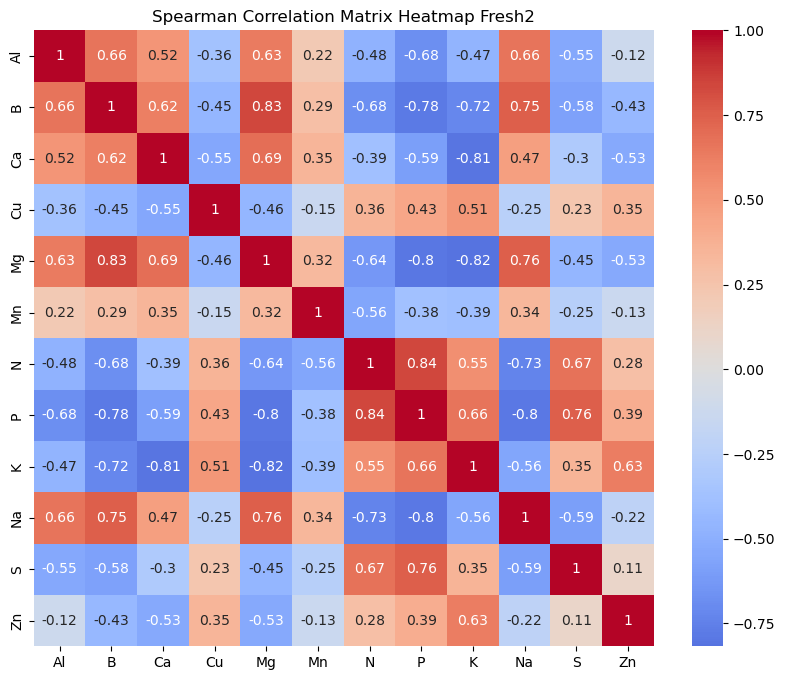

In [144]:
ds.generate_correlation_matrix(f2_targets, method="spearman", leaf_state="fresh", season=2)

In [145]:
ds.save_graph()

In [26]:
scaled_f2 = ds.min_max_scaler(f2_targets)
skewness_f2 = DataSummariser.summarize_skewness(f2_targets)
skewness_f2

Column  Skewness                Interpretation
0      Al  2.201270      Highly Positively Skewed
1       B  1.854227      Highly Positively Skewed
2      Ca  0.821787  Moderately Positively Skewed
3      Cu  3.366476      Highly Positively Skewed
4      Fe  7.597069      Highly Positively Skewed
5      Mg  0.583826  Moderately Positively Skewed
6      Mn  0.970022  Moderately Positively Skewed
7       N -0.260731       Approximately Symmetric
8       P  0.774494  Moderately Positively Skewed
9       K  0.222555       Approximately Symmetric
10     Na  0.528935  Moderately Positively Skewed
11      S  0.055121       Approximately Symmetric
12     Zn  1.026899      Highly Positively Skewed

### ds.generate_violin_plot(df=scaled_f2, leaf_state="fresh", season=2, figsize=(10,6))

In [148]:
ds.save_graph()

In [27]:
outliers_f2 = ds.detect_outliers_iqr(f2_targets)
outliers_f2

Al      B     Ca    Cu   Fe     Mg     Mn    N     P    K   Na    S  \
0     1.0  108.0  119.0   1.0    1  117.0   39.0  NaN  22.0  NaN  NaN  NaN   
1    95.0  110.0  128.0  17.0    3  130.0   40.0  NaN   NaN  NaN  NaN  NaN   
2   108.0  117.0  141.0  62.0    4    NaN   41.0  NaN   NaN  NaN  NaN  NaN   
3   109.0  118.0  142.0  64.0   47    NaN  112.0  NaN   NaN  NaN  NaN  NaN   
4   110.0  126.0  143.0  65.0   57    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
5   120.0  127.0    NaN   NaN   95    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
6   126.0  128.0    NaN   NaN  108    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
7   127.0  131.0    NaN   NaN  109    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
8   128.0  135.0    NaN   NaN  110    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
9   132.0    NaN    NaN   NaN  117    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
10  133.0    NaN    NaN   NaN  120    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
11  134.0    NaN    NaN   NaN  126    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
12  135.0    NaN    NaN   NaN  127    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
13  137.0    NaN    NaN   NaN  128    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
14  138.0    NaN    NaN   NaN  132    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
15  139.0    NaN    NaN   NaN  133    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
16  140.0    NaN    NaN   NaN  134    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
17    NaN    NaN    NaN   NaN  137    NaN    NaN  NaN   NaN  NaN  NaN  NaN   
18    NaN    NaN    NaN   NaN  140    NaN    NaN  NaN   NaN  NaN  NaN  NaN   

       Zn  
0     1.0  
1     4.0  
2     6.0  
3    15.0  
4    16.0  
5    17.0  
6   116.0  
7     NaN  
8     NaN  
9     NaN  
10    NaN  
11    NaN  
12    NaN  
13    NaN  
14    NaN  
15    NaN  
16    NaN  
17    NaN  
18    NaN

In [28]:
unique_values = outliers_f2.apply(lambda x: x.value_counts(dropna=True)).fillna(0).astype(int)
indices_df = pd.DataFrame(unique_values.sum(axis=1).sort_values(ascending=False))

In [30]:
indices_df

0
1.0    4
128.0  4
108.0  3
117.0  3
127.0  3
110.0  3
126.0  3
133.0  2
137.0  2
135.0  2
134.0  2
120.0  2
132.0  2
4.0    2
95.0   2
17.0   2
109.0  2
140.0  2
141.0  1
142.0  1
139.0  1
138.0  1
131.0  1
130.0  1
116.0  1
119.0  1
41.0   1
6.0    1
15.0   1
16.0   1
22.0   1
39.0   1
40.0   1
47.0   1
118.0  1
57.0   1
62.0   1
64.0   1
65.0   1
112.0  1
3.0    1
143.0  1

### Fresh 3

In [40]:
f3 = leaf_sample_reader.read_all_csvs(leaf_state="fresh", season=3)
f3 = DataCleaner.enforce_data_types(f3)
f3 = DataCleaner.drop_null_data(f3, row_threshold=0.5, target_col_threshold=0.5, feature_col_threshold=0.5)
f3 = DataCleaner.impute_data(f3, target_method=None, feature_method="neighbour_avg")

In [41]:
f3_targets = leaf_sample_reader.extract_targets(f3)

In [42]:
f3_targets.describe()

Al           B          Ca          Cu           Fe  \
count  105.000000  105.000000  105.000000  105.000000   105.000000   
mean    62.247619   21.926190    1.136667   13.765905   148.742857   
std     93.503782    8.515146    0.312910   10.042819   154.366449   
min     13.000000   16.540000    0.620000    4.140000    44.000000   
25%     30.000000   19.010000    0.940000    6.620000    78.000000   
50%     41.000000   20.060000    1.070000    9.370000   114.000000   
75%     58.000000   23.550000    1.240000   18.220000   157.000000   
max    766.000000   98.880000    2.200000   44.230000  1301.000000   

               Mg           Mn           N           P           K  \
count  105.000000   105.000000  104.000000  105.000000  105.000000   
mean     0.462667   349.219048    3.871250    0.214857    8.458000   
std      0.140967   237.068636    1.370211    0.106727    1.355012   
min      0.230000    69.000000    1.210000    0.070000    5.910000   
25%      0.360000   171.000000    2.947500    0.150000    7.280000   
50%      0.460000   272.000000    4.330000    0.190000    8.330000   
75%      0.550000   458.000000    5.015000    0.280000    9.410000   
max      0.840000  1050.000000    6.040000    0.550000   11.450000   

               Na           S          Zn  
count  105.000000  105.000000  105.000000  
mean     0.014476    0.163238   30.419048  
std      0.010468    0.041452   18.430629  
min      0.010000    0.090000    8.000000  
25%      0.010000    0.140000   17.000000  
50%      0.010000    0.160000   29.000000  
75%      0.010000    0.200000   40.000000  
max      0.070000    0.240000   84.000000

In [154]:
ds.generate_correlation_matrix(f3_targets, method="spearman", leaf_state="fresh", season=3)

In [155]:
ds.save_graph()

In [43]:
scaled_f3 = ds.min_max_scaler(f3_targets)
skewness_f3 = DataSummariser.summarize_skewness(f3_targets)
skewness_f3

Column  Skewness                Interpretation
0      Al  5.973079      Highly Positively Skewed
1       B  7.542224      Highly Positively Skewed
2      Ca  1.288922      Highly Positively Skewed
3      Cu  1.350272      Highly Positively Skewed
4      Fe  5.514510      Highly Positively Skewed
5      Mg  0.426113       Approximately Symmetric
6      Mn  1.164050      Highly Positively Skewed
7       N -0.410529       Approximately Symmetric
8       P  0.798799  Moderately Positively Skewed
9       K  0.240783       Approximately Symmetric
10     Na  3.063917      Highly Positively Skewed
11      S  0.103835       Approximately Symmetric
12     Zn  1.031957      Highly Positively Skewed

In [157]:
ds.generate_violin_plot(df=scaled_f3, leaf_state="fresh", season=3, figsize=(10,6))

In [158]:
ds.save_graph()

In [44]:
outliers_f3 = ds.detect_outliers_iqr(f3_targets)
outliers_f3

Al     B    Ca    Cu    Fe    Mg    Mn    N     P    K  Na    S    Zn
0    17.0  87.0   0.0  18.0  17.0  17.0  31.0  NaN  99.0  NaN   0  NaN  23.0
1    22.0  94.0   2.0  23.0  22.0   NaN  35.0  NaN   NaN  NaN   3  NaN  35.0
2    30.0   NaN   5.0  28.0  30.0   NaN  40.0  NaN   NaN  NaN   5  NaN  40.0
3    35.0   NaN  10.0  43.0  35.0   NaN  43.0  NaN   NaN  NaN   8  NaN  83.0
4    40.0   NaN  77.0  87.0  40.0   NaN   NaN  NaN   NaN  NaN  10  NaN   NaN
5    42.0   NaN  82.0   NaN  42.0   NaN   NaN  NaN   NaN  NaN  13  NaN   NaN
6    58.0   NaN   NaN   NaN  87.0   NaN   NaN  NaN   NaN  NaN  15  NaN   NaN
7    87.0   NaN   NaN   NaN  99.0   NaN   NaN  NaN   NaN  NaN  19  NaN   NaN
8    99.0   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  20  NaN   NaN
9   104.0   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  24  NaN   NaN
10    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  25  NaN   NaN
11    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  29  NaN   NaN
12    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  45  NaN   NaN
13    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  50  NaN   NaN
14    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  51  NaN   NaN
15    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  55  NaN   NaN
16    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  58  NaN   NaN
17    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  60  NaN   NaN
18    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  63  NaN   NaN
19    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  65  NaN   NaN
20    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  70  NaN   NaN
21    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  87  NaN   NaN
22    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  94  NaN   NaN
23    NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN  99  NaN   NaN

In [45]:
unique_values = outliers_f3.apply(lambda x: x.value_counts(dropna=True)).fillna(0).astype(int)
indices_df = pd.DataFrame(unique_values.sum(axis=1).sort_values(ascending=False))

In [47]:
indices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 87.0 to 104.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       40 non-null     int64
dtypes: int64(1)
memory usage: 640.0 bytes
